# KM.ON JIRA Data Analysis

In [1]:
#import JIRA module
from jira import JIRA
import json
import requests
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt 

In [2]:
#Retrieve all stories in the current sprint
jira_server = 'https://kmooon.atlassian.net/'
jira_options =  {'server': jira_server}
jira = JIRA(options=jira_options, basic_auth=("mario.weil@kmon.net", ""))
project_keys = ['kmagent', 'k.iam', 'arg', 'dpm', 'kapi']
# Project key
project_key = 'KPB'


In [3]:
# Get all Epics in the project
jql = f'project = {project_key} AND issuetype = Epic AND status not in ("Closed", "Done", "Rejected")'
epics = jira.search_issues(jql)

# List to hold Epics that are more than 80% done
epics_more_than_79_done = []
# List to hold Epics that have no child issue assigned
epics_wo_child_issue = []

# Check each Epic
for epic in epics:
    # Get child issues
    jql = f'"Epic Link" = {epic.key}'
    child_issues = jira.search_issues(jql)

    if child_issues:
        # Counters for total and done issues
        total_issues = len(child_issues)
        done_issues = 0

        # Check each child issue
        for issue in child_issues:
            # If the issue is done
            if issue.fields.status.name in ['Closed', 'Done', 'Resolved', 'Rejected']:
                done_issues += 1

        # Calculate the percentage of done issues
        percent_done = (done_issues / total_issues) * 100

        # If more than 80% of the issues are done, add the Epic to the list
        if percent_done > 79:
            epics_more_than_79_done.append(epic.key)
    else:
        if epic.fields.status in ['In Development', 'In Refinement']:
            epics_wo_child_issue.append(epic.key)

# Print the Epics that are more than 80% done
print('Epics that more than 79% done')
for epic in epics_more_than_79_done:
    print(epic)
# Print the Epics that have no child issue assigned
print('Epics that have no child issue')
for epic in epics_wo_child_issue:
    print(epic)

Epics that more than 79% done
KPB-256
KPB-185
KPB-157
KPB-119
KPB-107
KPB-90
KPB-9
Epics that have no child issue


In [4]:
# Initialize an empty dataframe
df = pd.DataFrame()

# Get all bugs and stories in the projects
for project_key in project_keys:
    jql = f'project = {project_key} AND issuetype in (Bug, Story) AND resolutiondate is not EMPTY'
    issues = jira.search_issues(jql, maxResults=False)

    # Extract relevant data from each issue
    for issue in issues:
        creation_date = issue.fields.created
        resolution_date = issue.fields.resolutiondate
        time_to_done = pd.to_datetime(resolution_date) - pd.to_datetime(creation_date)
        temp_df = pd.DataFrame({
            'Project': [project_key],
            'Issue': [issue.key],
            'Issue Type': [issue.fields.issuetype.name],
            'Time to Done': [time_to_done.total_seconds() / 86400]  # in days
        })
        df = pd.concat([df, temp_df], ignore_index=True)

# Calculate mean time to done for each issue type in each project
mean_times = df.groupby(['Project', 'Issue Type'])['Time to Done'].mean().unstack()

# Plot mean times
mean_times.plot(kind='bar', stacked=False)
plt.ylabel('Mean Time to Done (hours)')
plt.title('Mean Time to Done for Bugs and Stories')
plt.show()


KeyboardInterrupt: 

In [ ]:
#Iterate through stories of the (projects) and retrieve information
df = pd.DataFrame()
bug_mean_time_list = []
bug1_mean_time_list = []
story_mean_time_list = []
for project in project_keys:
     jql = f'project = {project} AND type in (Bug, Story, Task) AND status = Done AND created >= -180d'
     stories = jira.search_issues(jql)
     # Create dataframe from stories
     df_tmp = pd.DataFrame([(s.key, s.fields.summary, s.fields.issuetype.name, s.fields.status.name, s.fields.assignee, s.fields.created, s.fields.resolutiondate) for s in stories], \
          columns=['Key', 'Summary', 'Type', 'Status', 'Assignee', 'Created', 'Resolution'])

     df_tmp['Resolution'] = pd.to_datetime(df_tmp['Resolution'])
     df_tmp['Created'] = pd.to_datetime(df_tmp['Created'])
     df_tmp['difference_in_days'] = (df_tmp['Resolution'] - df_tmp['Created']).dt.days

     #calculating the mean time for recovery
     bug_mean_time_list.append(df_tmp.loc[df_tmp['Type'] == 'Bug', 'difference_in_days'].mean())
     story_mean_time_list.append(df_tmp.loc[df_tmp['Type'] == 'Story', 'difference_in_days'].mean())

     df = pd.concat([df, df_tmp], ignore_index=True)

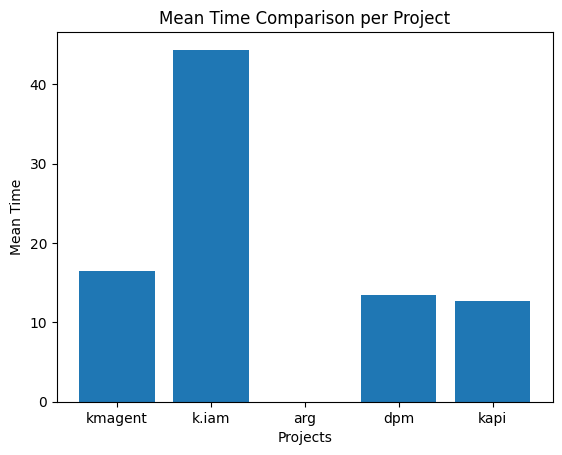

In [ ]:
plt.bar(project_keys, story_mean_time_list) 
plt.title("Mean Time Comparison per Project") 
plt.xlabel("Projects") 
plt.ylabel("Mean Time") 

plt.show()

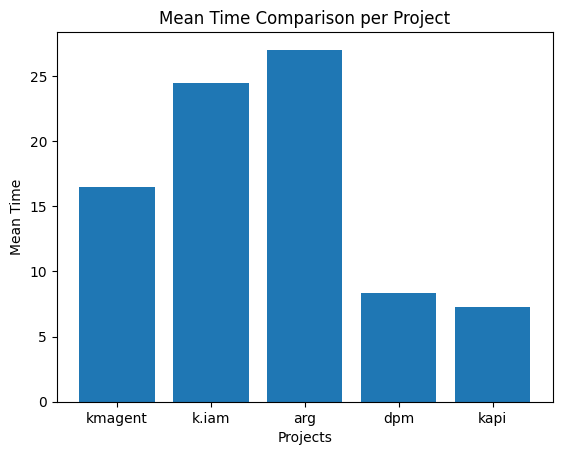

In [ ]:

plt.bar(projects, bug_mean_time_list) 
plt.title("Mean Time Comparison per Project") 
plt.xlabel("Projects") 
plt.ylabel("Mean Time") 

plt.show()

In [ ]:
# The ID of your board
board_id = 1

# Get all issues for the current sprint
jql_query = f'project = "kmagent" AND Sprint in openSprints()'
issues = jira.search_issues(jql_query, maxResults=False)

# Collect all epics
epics = {}

for issue in issues:
    # Check if issue is a sub-task
    if issue.fields.issuetype.subtask:
        parent = jira.issue(issue.fields.parent.key)
        epic_key = parent.fields.customfield_10000  # Replace customfield_10000 with the actual field id for Epic Link
    else:
        epic_key = issue.fields.customfield_10000  # Replace customfield_10000 with the actual field id for Epic Link

    # Fetch epic if not fetched before
    if epic_key and epic_key not in epics:
        epics[epic_key] = jira.issue(epic_key)

# Now you have a dictionary of epics (epics) where the key is the epic key and the value is the epic issue object


JIRAError: JiraError HTTP 400 url: https://kmooon.atlassian.net/rest/api/2/issue/%7B%7D
	text: 









<html>

<head>
    <title>Bad Request (400)</title>
    





<!--[if IE]><![endif]-->
<script type="text/javascript" >
    var contextPath = '';
    var DeferScripts = { deferState: 'disabled' };
</script>
<script>
window.WRM=window.WRM||{};window.WRM._unparsedData=window.WRM._unparsedData||{};window.WRM._unparsedErrors=window.WRM._unparsedErrors||{};
WRM._unparsedData["com.atlassian.plugins.atlassian-plugins-webresource-plugin:context-path.context-path"]="\"\"";
WRM._unparsedData["com.atlassian.plugins.atlassian-plugins-webresource-rest:curl.cross-origin-resources"]="false";
WRM._unparsedData["jira.webresources:feature-flags.feature-flag-data"]="{\"enabled-feature-keys\":[\"com.atlassian.jira.projects.issuenavigator\",\"connect.no-applinks\",\"nps.survey.inline.dialog\",\"atlassian.aui.raphael.disabled\",\"com.atlassian.jira.projects.ProjectCentricNavigation.Switch\"],\"feature-flag-states\":{\"com.atlassian.jira.plugins.mail.internal\":false,\"com.atlassian.jira.feature.flag.for.TestFeatureFlagResource\":false,\"jira.feature.rest.single.step.avatar.upload\":true,\"jira.ondemand.maintain.trusted.apps\":true}}";
WRM._unparsedData["com.atlassian.jira.jira-client-analytics-plugin:analytics-context-provider.client-analytic-descriptors"]="{\"analyticsResource\":{\"jira-core\":{\"events\":{\"issue.comment.added\":{\"trigger\":\"click #issue-comment-add-submit\",\"properties\":{\"comment-length\":\"value.length #issue-comment-add #comment\"}}}}},\"tenantId\":\"73af1920-f303-409b-9b4e-4bfb4578b6dc\",\"env\":\"prod\"}";
WRM._unparsedData["jira.webresources:default-comment-security-level.DefaultCommentSecurityLevelHelpLink"]="{\"extraClasses\":\"default-comment-level-help\",\"title\":\"Commenting on an Issue\",\"url\":\"https://confluence.atlassian.com/display/JIRACORECLOUD/Editing+and+collaborating+on+issues#Editingandcollaboratingonissues-addcommentsCommentingonissues\",\"isLocal\":false}";
WRM._unparsedData["jira.webresources:key-commands.shortcuts"]="[{\"moduleKey\":\"go-to-dashboard-kb-shortcut\",\"keys\":[[\"g\",\"d\"]],\"context\":\"global\",\"op\":\"goTo\",\"param\":\"/secure/Dashboard.jspa\"},{\"moduleKey\":\"browse-project-kb-shortcut\",\"keys\":[[\"g\",\"p\"]],\"context\":\"global\",\"op\":\"execute\",\"param\":\"var elem = jQuery(\\\"#browse_link\\\");\\n                if (elem.length \u003e 0) {\\n                    window.location.href = elem.attr(\\\"href\\\");\\n                }\"},{\"moduleKey\":\"issue-navigator-kb-shortcut\",\"keys\":[[\"g\",\"i\"]],\"context\":\"global\",\"op\":\"execute\",\"param\":\"var elem = jQuery(\\\"#find_link\\\");\\n                if (elem.length \u003e 0) {\\n                    window.location.href = elem.attr(\\\"href\\\");\\n                }\"},{\"moduleKey\":\"admin.quicksearch.dialog.shortcut\",\"keys\":[[\"g\",\"g\"]],\"context\":\"global\",\"op\":\"execute\",\"param\":\"JIRA.Shifter.show();\"},{\"moduleKey\":\"quicksearch\",\"keys\":[[\"/\"]],\"context\":\"global\",\"op\":\"moveToAndFocus\",\"param\":\"#quickSearchInput, #admin-quick-nav-field\"},{\"moduleKey\":\"create.issue\",\"keys\":[[\"c\"]],\"context\":\"global\",\"op\":\"moveToAndClick\",\"param\":\"#header .create-issue\"},{\"moduleKey\":\"shifter\",\"keys\":[[\".\"]],\"context\":\"global\",\"op\":\"execute\",\"param\":\"JIRA.Shifter.show();\"},{\"moduleKey\":\"help\",\"keys\":[[\"?\"]],\"context\":\"global\",\"op\":\"click\",\"param\":\"#keyshortscuthelp\"}]";
WRM._unparsedData["com.atlassian.plugins.atlassian-connect-plugin:dialog-options.data"]="{\"allJsVersion\":\"1.3.64\",\"dialogOptions\":{\"com.atlassian.jira.spreadsheets__open-in-excel\":{\"height\":\"280px\",\"chrome\":false,\"width\":\"480px\"},\"com.atlassian.jira.spreadsheets__open-in-gsheets\":{\"height\":\"280px\",\"chrome\":false,\"width\":\"480px\"}},\"inlineDialogOptions\":{},\"dialogModules\":{\"atlassian-outlook-integration\":{\"email-deletion-confirmation-dialog\":{\"cacheable\":false,\"options\":{\"height\":\"148px\",\"width\":\"400px\"},\"key\":\"email-deletion-confirmation-dialog\"},\"email-view-dialog\":{\"cacheable\":false,\"options\":{\"size\":\"maximum\"},\"key\":\"email-view-dialog\"}},\"com.invisionapp.integration.jira\":{\"expand\":{\"cacheable\":false,\"options\":{},\"key\":\"expand\"},\"auth\":{\"cacheable\":false,\"options\":{},\"key\":\"auth\"}},\"jira-slack-integration\":{\"connected-channels-deletion-confirmation-dialog\":{\"cacheable\":false,\"options\":{\"size\":\"maximum\"},\"key\":\"connected-channels-deletion-confirmation-dialog\"},\"connected-channels-new-connection-dialog\":{\"cacheable\":false,\"options\":{\"size\":\"maximum\"},\"key\":\"connected-channels-new-connection-dialog\"},\"connected-channels-update-connection-dialog\":{\"cacheable\":false,\"options\":{\"size\":\"maximum\"},\"key\":\"connected-channels-update-connection-dialog\"}},\"stspg-jira-ops\":{\"unlink-incident\":{\"cacheable\":false,\"options\":{\"height\":\"232\",\"chrome\":false,\"width\":\"432\"},\"key\":\"unlink-incident\"}},\"rw-smart-checklists\":{\"rw-checklist-template-manager\":{\"cacheable\":false,\"options\":{},\"key\":\"rw-checklist-template-manager\"},\"rw-checklist-editor\":{\"cacheable\":false,\"options\":{},\"key\":\"rw-checklist-editor\"}}}}";
WRM._unparsedData["com.atlassian.plugins.atlassian-connect-plugin:jira-date-picker-widget.config"]="{\"dateFormat\":\"%e/%b/%y\",\"dateTimeFormat\":\"%e/%b/%y %I:%M %p\",\"timeFormat\":\"12\",\"firstDay\":1,\"useISO8601WeekNumbers\":false}";
WRM._unparsedData["jira.webresources:dateFormatProvider.dateFormat"]="{\"meridiem\":[\"AM\",\"PM\"],\"eras\":[\"BC\",\"AD\"],\"months\":[\"January\",\"February\",\"March\",\"April\",\"May\",\"June\",\"July\",\"August\",\"September\",\"October\",\"November\",\"December\"],\"monthsShort\":[\"Jan\",\"Feb\",\"Mar\",\"Apr\",\"May\",\"Jun\",\"Jul\",\"Aug\",\"Sep\",\"Oct\",\"Nov\",\"Dec\"],\"weekdaysShort\":[\"Sun\",\"Mon\",\"Tue\",\"Wed\",\"Thu\",\"Fri\",\"Sat\"],\"weekdays\":[\"Sunday\",\"Monday\",\"Tuesday\",\"Wednesday\",\"Thursday\",\"Friday\",\"Saturday\"]}";
WRM._unparsedData["com.atlassian.servicedesk.frontend-webpack-plugin:data-provider.webpack-meta"]="{\"locale\":\"en-US\",\"publicPath\":\"//d2nlwckrpk2btq.cloudfront.net/atl-vertigo--shard-jira-prod-eu-1--5--jres.atlassian.net/s/6i46lu/b/8/bbd69a1b2f7e749b1140ac8eeff8707bd9b47a8a/_/download/resources/com.atlassian.servicedesk.frontend-webpack-plugin:webpack-async-chunks/\"}";
WRM._unparsedData["com.atlassian.applinks.applinks-plugin:applinks-common-exported.applinks-types"]="{\"crowd\":\"Crowd\",\"confluence\":\"Confluence\",\"remote.plugin.container\":\"Atlassian Connect\",\"fecru\":\"FishEye / Crucible\",\"stash\":\"Bitbucket Server\",\"jira\":\"JIRA\",\"bamboo\":\"Bamboo\",\"generic\":\"Generic Application\"}";
WRM._unparsedData["com.atlassian.applinks.applinks-plugin:applinks-common-exported.entity-types"]="{\"singular\":{\"fecru.project\":\"Crucible Project\",\"fecru.repository\":\"FishEye Repository\",\"stash.project\":\"Bitbucket Server Project\",\"generic.entity\":\"Generic Project\",\"confluence.space\":\"Confluence Space\",\"bamboo.project\":\"Bamboo Project\",\"jira.project\":\"JIRA Project\"},\"plural\":{\"fecru.project\":\"Crucible Projects\",\"fecru.repository\":\"FishEye Repositories\",\"stash.project\":\"Bitbucket Server Projects\",\"generic.entity\":\"Generic Projects\",\"confluence.space\":\"Confluence Spaces\",\"bamboo.project\":\"Bamboo Projects\",\"jira.project\":\"JIRA Projects\"}}";
WRM._unparsedData["com.atlassian.applinks.applinks-plugin:applinks-common-exported.authentication-types"]="{\"com.atlassian.applinks.api.auth.types.BasicAuthenticationProvider\":\"Basic Access\",\"com.atlassian.applinks.api.auth.types.CorsAuthenticationProvider\":\"CORS\",\"com.atlassian.applinks.api.auth.types.OAuthAuthenticationProvider\":\"OAuth\",\"com.atlassian.applinks.api.auth.types.TwoLeggedOAuthAuthenticationProvider\":\"OAuth\",\"com.atlassian.applinks.api.auth.types.TwoLeggedOAuthWithImpersonationAuthenticationProvider\":\"OAuth\"}";
WRM._unparsedData["com.atlassian.crowd.user-provisioning-vertigo-plugin:create-users-resources.isSiteAdmin"]="false";
WRM._unparsedData["jira.webresources:avatar-picker.data"]="{\"isEnabled\":true,\"url\":\"/plugins/servlet/redirectToProfile?target=edit-avatar\"}";
WRM._unparsedData["com.atlassian.jira.jira-header-plugin:dismissedFlags.flags"]="{\"dismissed\":[]}";
WRM._unparsedData["com.atlassian.servicedesk.core-ui:util-help-links.help-links"]="{\"help\":{\"sla.settings\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/setting+up+slas\",\"email.settings\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Receiving+requests+by+email\",\"servicedesk.organizations\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Setting+up+service+desk+users#Settingupservicedeskusers-manageorgsManageorganizations\",\"request.type\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/configuring+request+types+and+workflows\",\"email.setup\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Receiving+requests+by+email\",\"servicedesk.users\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Setting+up+service+desk+users\",\"managing.queues\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Setting+up+queues+for+your+team\",\"documentation.home\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Jira+Service+Desk+Cloud+documentation\",\"multi.language.portal\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Translating+your+customer+portal+and+supporting+multiple+languages\",\"default\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/\",\"setting.up.reports\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Setting+up+service+desk+reports\",\"portal.settings\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/best+practices+for+designing+the+customer+portal\",\"getting.started.agent\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Getting+started+for+service+desk+agents\",\"queues.setup\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/setting+up+queues+for+your+team\",\"request.settings.help.bubble\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Managing+access+to+your+service+desk\",\"email.settings.suitablerequest\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Receiving+requests+by+email#Receivingrequestsbyemail-suitablerequest\",\"servicedesk.software.teams\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/best+practices+for+software+teams+using+jira+service+desk\",\"create.space.help\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Serving+customers+with+a+knowledge+base#serving-customers-with-a-knowledge-base-createpermission\",\"admin.notifications.config\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Configuring+service+desk+notifications\",\"email.settings.troubleshooting\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Troubleshooting+issues+with+the+email+channel\",\"troubleshoot.requesttype\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Troubleshooting+issues+with+request+types\",\"approvals.configuration\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Configuring+JIRA+Service+Desk+approvals\",\"public.signup\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Configuring+public+signup\",\"resolve.permission.scheme.errors\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Resolving+permission+scheme+errors\",\"knowledge.base\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Serving+customers+with+a+knowledge+base\",\"getting.started\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Getting+started+with+JIRA+Service+Desk\",\"invite.customers\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Managing+access+to+your+service+desk\"},\"kb\":{\"default\":\"https://confluence.atlassian.com/display/SDKB/\",\"legacytransition\":\"https://confluence.atlassian.com/display/SDKB/Replacing+legacy+automatic+transitions+with+automation+rules\",\"umtroubleshoot\":\"https://confluence.atlassian.com/display/SDKB/Troubleshooting+issues+with+service+desk+user+management\"}}";
WRM._unparsedData["com.atlassian.servicedesk.core-ui:util-base-url.base-url"]="\"https://kmooon.atlassian.net\"";
WRM._unparsedData["com.atlassian.jira.ext.calendar:tipDataProvider.tip"]="{\"suppressTip\":false}";
WRM._unparsedData["com.atlassian.jira.plugins.jira-browser-metrics:browser-metrics-client.git-commit-id"]="\"bbd69a1b2f7e749b1140ac8eeff8707bd9b47a8a\"";
WRM._unparsedData["jira.webresources:user-message-flags.adminLockout"]="{}";
WRM._unparsedData["com.atlassian.plugins.helptips.jira-help-tips:help-tip-manager.JiraHelpTipData"]="{\"anonymous\":true}";
if(window.WRM._dataArrived)window.WRM._dataArrived();</script>
<link type="text/css" rel="stylesheet" href="//d2nlwckrpk2btq.cloudfront.net/atl-vertigo--shard-jira-prod-eu-1--5--jres.atlassian.net/s/d41d8cd98f00b204e9800998ecf8427e-CDN/6i46lu/b/8/966b490e3162d501431dc314a0dfa572/_/download/contextbatch/css/_super/batch.css?relative-url=true" data-wrm-key="_super" data-wrm-batch-type="context" media="all">
<link type="text/css" rel="stylesheet" href="//d2nlwckrpk2btq.cloudfront.net/atl-vertigo--shard-jira-prod-eu-1--5--jres.atlassian.net/s/d41d8cd98f00b204e9800998ecf8427e-CDN/6i46lu/b/8/13da843dcec9ec6182575e761372d3a2/_/download/contextbatch/css/atl.general,jira.general,atl.global,jira.global,-_super/batch.css?agile_global_admin_condition=true&amp;feature-enable-ip-allowlisting-alerts=true&amp;jag=true&amp;relative-url=true&amp;sd_operational=true" data-wrm-key="atl.general,jira.general,atl.global,jira.global,-_super" data-wrm-batch-type="context" media="all">
<script type="text/javascript" src="//d2nlwckrpk2btq.cloudfront.net/atl-vertigo--shard-jira-prod-eu-1--5--jres.atlassian.net/s/d41d8cd98f00b204e9800998ecf8427e-CDN/6i46lu/b/8/1e86475664155eaaeecb828f3026e4ea/_/download/contextbatch/js/_super/batch.js?locale=en-US" data-wrm-key="_super" data-wrm-batch-type="context" data-initially-rendered></script>
<script type="text/javascript" src="//d2nlwckrpk2btq.cloudfront.net/atl-vertigo--shard-jira-prod-eu-1--5--jres.atlassian.net/s/d41d8cd98f00b204e9800998ecf8427e-CDN/6i46lu/b/8/ffdb0f8b316123436949cfb5ba1e6ba8/_/download/contextbatch/js/atl.general,jira.general,atl.global,jira.global,-_super/batch.js?agile_global_admin_condition=true&amp;feature-enable-ip-allowlisting-alerts=true&amp;jag=true&amp;locale=en-US&amp;sd_operational=true" data-wrm-key="atl.general,jira.general,atl.global,jira.global,-_super" data-wrm-batch-type="context" data-initially-rendered></script>
<script>
window.WRM=window.WRM||{};window.WRM._unparsedData=window.WRM._unparsedData||{};window.WRM._unparsedErrors=window.WRM._unparsedErrors||{};
WRM._unparsedData["_wrmBatchContents"]="{\"js\":{\"_super\":[\"jira.webresources:es6-promise\",\"jira.webresources:promise-polyfill\",\"jira.webresources:usertiming-polyfill\",\"jira.webresources:almond\",\"jira.webresources:almond-analytics\",\"com.atlassian.auiplugin:aui-reset\",\"com.atlassian.auiplugin:aui-page-typography\",\"com.atlassian.auiplugin:aui-avatars\",\"com.atlassian.auiplugin:aui-page-layout\",\"com.atlassian.plugins.atlassian-plugins-webresource-plugin:data\",\"com.atlassian.plugins.atlassian-plugins-webresource-plugin:context-path\",\"com.atlassian.auiplugin:ajs-contextpath\",\"com.atlassian.plugins.jquery:jquery-1.7.2\",\"com.atlassian.plugins.jquery:jquery\",\"com.atlassian.auiplugin:jquery-lib\",\"com.atlassian.auiplugin:jquery-compatibility\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-polyfills-console\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-jquery\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-create-element\",\"com.atlassian.auiplugin:internal-object-assign-4.0.1-index\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-globalize\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-deprecation\",\"com.atlassian.auiplugin:aui-deprecation\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-polyfills-custom-event\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-constants\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-version\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-globals\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-data\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-mutation-observer\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-utils\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-registry\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-lifecycle\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-fix-ie-innerhtml\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-document-observer\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-skate\",\"com.atlassian.auiplugin:internal-tether-0.6.5-tether\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-version\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-prevent-default\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-stop-event\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-index-of\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-contains\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-include\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-toggle-class-name\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-set-visible\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-set-current\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-is-visible\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-is-clipped\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-params\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-populate-parameters\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-log\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-to-init\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-firebug\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-clone\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-alphanum\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-on-text-resize\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-unbind-text-resize\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-escape\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-escape-html\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-filter-by-search\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-debounce\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-unique-id\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-add-id\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-forms\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-setup\",\"com.atlassian.auiplugin:deprecated-legacy-ajs-file\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-format\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-animation\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-feature-flags\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-blanket\",\"com.atlassian.auiplugin:aui-core\",\"com.atlassian.auiplugin:internal-basic-css\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-jquery-plugins-jquery-aop\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-drop-down\",\"com.atlassian.auiplugin:dropdown\",\"com.atlassian.auiplugin:icons\",\"com.atlassian.auiplugin:table\",\"com.atlassian.auiplugin:internal-form-css\",\"com.atlassian.auiplugin:internal-message-css\",\"com.atlassian.auiplugin:ajs-gadgets-base\",\"com.atlassian.auiplugin:toolbar\",\"com.atlassian.auiplugin:aui-buttons\",\"com.atlassian.auiplugin:aui-toolbar2\",\"com.atlassian.soy.soy-template-plugin:soy-deps\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-widget\",\"com.atlassian.auiplugin:internal-aui-widget\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-i18n-aui\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-i18n\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-skate\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-navigation\",\"com.atlassian.auiplugin:aui-navigation\",\"com.atlassian.auiplugin:aui-experimental-iconfont\",\"com.atlassian.auiplugin:aui-header-unresponsive\",\"com.atlassian.auiplugin:internal-skatejs-template-html-0.0.0-dist-template-html\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-header-create-header\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-header\",\"com.atlassian.auiplugin:aui-header\",\"com.atlassian.auiplugin:aui-page-header\",\"com.atlassian.auiplugin:aui-page-suite\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-focus-manager\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-key-code\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-layer\",\"com.atlassian.auiplugin:aui-feature-flags\",\"com.atlassian.auiplugin:aui-focus-manager\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-layer-manager\",\"com.atlassian.auiplugin:keycode\",\"com.atlassian.auiplugin:aui-layer-manager\",\"com.atlassian.auiplugin:layer\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-alignment\",\"com.atlassian.auiplugin:aui-alignment\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-browser\",\"com.atlassian.auiplugin:internal-aui-browser\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-state\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-dropdown2\",\"com.atlassian.auiplugin:aui-dropdown2\",\"com.atlassian.auiplugin:internal-fancy-file-input-2.0.1-dist-fancy-file-input\",\"com.atlassian.auiplugin:internal-src-js-aui-fancy-file-input\",\"com.atlassian.auiplugin:fancy-file-input\",\"com.atlassian.auiplugin:hotkeys\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-event\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-dialog\",\"com.atlassian.auiplugin:dialog\",\"com.atlassian.auiplugin:internal-css.escape-1.5.0-css-escape\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-inline-dialog\",\"com.atlassian.auiplugin:internal-inline-dialog-common\",\"com.atlassian.auiplugin:inline-dialog\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-template\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-messages\",\"com.atlassian.auiplugin:message\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-tabs\",\"com.atlassian.auiplugin:tabs\",\"com.atlassian.auiplugin:jquery-ui-core-1.8.24-patched\",\"com.atlassian.auiplugin:jquery-ui-core\",\"com.atlassian.auiplugin:internal-jquery-ui-partial\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-jquery-jquery-hotkeys\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-jquery-jquery-moveto\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-underscorejs-underscore\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-underscore\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-when-i-type\",\"com.atlassian.auiplugin:internal-keyboardshortcuts\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-cookie\",\"com.atlassian.auiplugin:cookie\",\"com.atlassian.auiplugin:template\",\"com.atlassian.auiplugin:event\",\"com.atlassian.auiplugin:internal-ajs-no-context-path\",\"com.atlassian.auiplugin:ajs\",\"com.atlassian.auiplugin:jquery-ui\",\"com.atlassian.plugin.jslibs:jquery.textoverflow-0.7.4\",\"com.atlassian.plugin.jslibs:jquery.pjax-2011.07.10\",\"com.atlassian.plugin.jslibs:jquery.lazyload-1.8.0\",\"com.atlassian.plugin.jslibs:jquery.flot-0.7\",\"com.atlassian.plugin.jslibs:jquery.effects-1.8rc3\",\"com.atlassian.plugin.jslibs:jquery.dragtable-2.0.4\",\"com.atlassian.plugin.jslibs:jquery.serializeobject-0.2\",\"com.atlassian.plugin.jslibs:jquery.scrollintoview-1.8\",\"jira.webresources:jquery\",\"jira.webresources:aui-core-amd-shim\",\"com.atlassian.auiplugin:aui-badge\",\"com.atlassian.auiplugin:aui-lozenge\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-spin-spin\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-jquery-jquery-spin\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-spin\",\"com.atlassian.auiplugin:aui-spinner\",\"com.atlassian.auiplugin:aui-experimental-spinner\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-amdify\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-flag\",\"com.atlassian.auiplugin:aui-flag\",\"com.atlassian.plugins.atlassian-plugins-webresource-rest:curl\",\"com.atlassian.plugins.atlassian-plugins-webresource-rest:require-handler-v2\",\"com.atlassian.plugins.atlassian-plugins-webresource-rest:web-resource-manager\",\"com.atlassian.plugin.jslibs:skate-0.12.6\",\"jira.webresources:skate\",\"jira.webresources:icons\",\"jira.webresources:jira-logger\",\"jira.webresources:deprecator\",\"jira.webresources:legacy-namespacing\",\"com.atlassian.auiplugin:ajs-underscorejs\",\"jira.webresources:ajs-underscorejs-amd-shim\",\"jira.webresources:jira-metadata\",\"jira.webresources:aui-extensions\",\"jira.webresources:feature-flags\",\"jira.webresources:jira-events\",\"jira.webresources:jira-formatter\",\"jira.webresources:browser-properties\",\"jira.webresources:top-same-origin-window\",\"jira.webresources:util-lite\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-backbone-backbone\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-backbone\",\"com.atlassian.auiplugin:ajs-backbone\",\"jira.webresources:ajs-backbone-amd-shim\",\"jira.webresources:number-formatter\",\"jira.webresources:util\",\"jira.webresources:content-retrievers\",\"jira.webresources:list-styles\",\"jira.webresources:inline-layer\",\"jira.webresources:list\",\"jira.webresources:dropdown\",\"jira.webresources:issue-table-adg3\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-jquery-jquery-tipsy\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-tipsy\",\"com.atlassian.auiplugin:aui-tipsy\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-tooltip\",\"com.atlassian.auiplugin:aui-tooltips\",\"com.atlassian.auiplugin:aui-experimental-tooltips\",\"com.atlassian.plugins.issue-status-plugin:issue-status-resources\",\"jira.webresources:issue-statuses\",\"jira.webresources:issue-table\",\"jira.webresources:select-model\",\"jira.webresources:general-configuration\",\"com.atlassian.auiplugin:aui-experimental-soy-templates\",\"jira.webresources:js-soy-templates\",\"jira.webresources:page-loading-indicator\",\"jira.webresources:messages\",\"jira.webresources:jira-dialog-core\",\"com.atlassian.jira.jira-issue-nav-plugin:issues-api\",\"com.atlassian.jira.jira-issue-nav-plugin:issuenav-legacy\",\"jira.webresources:jira-issuenavigator\",\"jira.webresources:jira-dialog-config\",\"jira.webresources:set-focus\",\"jira.webresources:select-pickers\",\"jira.webresources:jira-analytics-amd\",\"jira.webresources:trigger-custom-event\",\"com.atlassian.jira.jira-client-analytics-plugin:analytics-web-client-library\",\"com.atlassian.jira.jira-client-analytics-plugin:analytics-context-provider\",\"com.atlassian.jira.jira-client-analytics-plugin:analytics-events-transformers\",\"com.atlassian.jira.jira-client-analytics-plugin:analytics-web-client\",\"jira.webresources:shifter\",\"com.atlassian.jira.jira-npmbridge-plugin:atlassian-spa-iframe-amd\",\"com.atlassian.plugins.browser.metrics.browser-metrics-plugin:api\",\"com.atlassian.jira.jira-atlaskit-plugin:sidebar\",\"com.atlassian.jira.jira-atlaskit-plugin:forge\",\"com.atlassian.jira.jira-atlaskit-plugin:container-api\",\"jira.webresources:inline-attach\",\"jira.webresources:dialogs\",\"jira.webresources:default-comment-security-level\",\"jira.webresources:dropdown-select\",\"jira.webresources:user-management\",\"jira.webresources:mentions-base\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-progressive-data-set\",\"com.atlassian.auiplugin:aui-experimental-data-handlers\",\"jira.webresources:data-sets\",\"jira.webresources:mentions-feature\",\"jira.webresources:mentions\",\"jira.webresources:jira-edition\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-banner\",\"com.atlassian.auiplugin:aui-banner\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-trigger\",\"com.atlassian.auiplugin:aui-trigger\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-attributes\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-enforcer\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-inline-dialog2\",\"com.atlassian.auiplugin:aui-inline-dialog2\",\"jira.webresources:keyboard-shortcut-toggle\",\"jira.webresources:assignee-picker\",\"jira.webresources:jira-global\",\"jira.webresources:key-commands\",\"jira.webresources:header\",\"jira.webresources:superbatch-default\",\"_context:_super\"],\"atl.general,jira.general,atl.global,jira.global,-_super\":[\"com.atlassian.analytics.analytics-client:js-events\",\"com.atlassian.plugins.atlassian-nav-links-plugin:application-header-administration-cog-resource\",\"com.atlassian.plugins.atlassian-nav-links-plugin:administration-shortcuts-resources\",\"com.atlassian.plugins.atlassian-nav-links-plugin:administration-shortcuts\",\"com.atlassian.plugins.atlassian-nav-links-plugin:rotp-projectshortcuts\",\"com.atlassian.plugins.atlassian-nav-links-plugin:atlassian-ui-popup-display-controller\",\"com.atlassian.jira.jira-issue-link-web-plugin:issue-link-web-link\",\"com.atlassian.jconnect.jconnect-plugin:common\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-dialog2\",\"com.atlassian.auiplugin:dialog2\",\"com.atlassian.plugins.atlassian-connect-plugin:dialog-options\",\"com.atlassian.plugins.atlassian-connect-plugin:dialog-options-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:iframe-host-css-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:iframe-host-utils-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-core-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-spa-context-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-navigator-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-extensions-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-user-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:content-resolver-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-context-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:module-loader-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:iframe-insertion-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:iframe-host-js-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-workflow-post-function-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-date-picker-widget\",\"com.atlassian.jira.jira-quick-edit-plugin:quick-create-calendar-init\",\"jira.webresources:calendar\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-date-picker-widget-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-events-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-create-issue-dialog-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-dashboard-item-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-navigator-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-navigator-routes-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-jql-editor-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-platform-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-product-extensions-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-module-loader-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-spa-api-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-atlassian-connect-resources-v5\",\"jira.webresources:dateFormatProvider\",\"com.atlassian.plugin.jslibs:moment-2.29.4\",\"com.atlassian.plugin.jslibs:moment\",\"jira.webresources:momentjs\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:shared-utility\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:dnd-utility\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:dnd-upload\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:attachment-integration\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:jira-html5-attach-images-resources\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:dnd-amd\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:attachment-menu-link-init\",\"com.atlassian.plugin.jslibs:bluebird-2.3.6\",\"com.atlassian.jira.jira-onboarding-assets-plugin:promise\",\"com.atlassian.jira.plugins.jira-development-integration-plugin:repository-shortcuts-administer-notifier\",\"com.atlassian.jira.plugins.jira-development-integration-plugin:devsummarycf-resources-init\",\"com.atlassian.jira.jira-atlaskit-plugin:spa-iframe-bindings\",\"com.atlassian.jira.jira-atlaskit-plugin:spa-iframe-host\",\"com.atlassian.jira.jira-atlaskit-plugin:spa-iframe\",\"com.atlassian.jira.jira-atlaskit-plugin:tempo-vendor-app-padding\",\"com.atlassian.jira.jira-atlaskit-plugin:async-modals\",\"com.atlassian.jira.jira-atlaskit-plugin:global-cache\",\"com.atlassian.jira.jira-atlaskit-plugin:profilecard\",\"com.atlassian.jira.jira-atlaskit-plugin:ipblocklisting\",\"com.atlassian.jira.jira-projects-plugin:data\",\"com.atlassian.jira.jira-projects-plugin:projects-api\",\"com.atlassian.jira.jira-atlaskit-plugin:breadcrumbs\",\"com.atlassian.jira.jira-atlaskit-plugin:overrides-general\",\"com.atlassian.jira.jira-atlaskit-plugin:overrides-aui-select2\",\"com.atlassian.jira.jira-atlaskit-plugin:overrides-dialogs\",\"com.atlassian.jira.jira-atlaskit-plugin:overrides-aui-toggle\",\"com.atlassian.servicedesk.frontend-webpack-plugin:data-provider\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-constants\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-toggle\",\"com.atlassian.auiplugin:aui-toggle\",\"com.atlassian.plugin.jslibs:backbone-1.0.0-factory-legacy\",\"com.atlassian.plugin.jslibs:backbone-1.0.0-factory\",\"com.atlassian.plugin.jslibs:brace-1.1.0-factory\",\"com.atlassian.servicedesk.frontend-webpack-plugin:context-deps-atl.general\",\"com.atlassian.servicedesk.frontend-webpack-plugin:context-deps-atl.general.asset.unlicensed\",\"com.atlassian.servicedesk.frontend-webpack-plugin:context-common-jsd-entry-chunk\",\"com.atlassian.servicedesk.frontend-webpack-plugin:context-atl.general\",\"com.atlassian.servicedesk.frontend-webpack-plugin:context-atl.general.asset.unlicensed\",\"com.atlassian.plugin.jslibs:underscore-1.5.2\",\"com.atlassian.applinks.applinks-plugin:lodash-amd\",\"com.atlassian.applinks.applinks-plugin:applinks-lib\",\"com.atlassian.applinks.applinks-plugin:applinks-public\",\"com.atlassian.applinks.applinks-plugin:applinks-common-exported\",\"com.atlassian.applinks.applinks-plugin:applinks-util-js\",\"com.atlassian.jira.jira-issue-link-applinks-common-plugin:issue-link-applinks\",\"com.atlassian.jira.jira-issue-link-remote-jira-plugin:issue-link-remote-jira-js\",\"com.atlassian.jira.jira-issue-link-remote-jira-plugin:issue-link-jira-search-js\",\"com.atlassian.teams:teams-wr-custom-field-styles-common\",\"com.atlassian.teams:teams-wr-custom-field-scripts-common\",\"com.atlassian.teams:teams-wr-custom-field-team\",\"com.atlassian.jira.jira-issue-nav-components:ajs-helper\",\"com.atlassian.jira.jira-issue-nav-components:underscore\",\"com.atlassian.jira.jira-issue-nav-components:analytics-tracker\",\"com.atlassian.jira.jira-view-issue-plugin:issuelink-bridge-global-init\",\"com.atlassian.crowd.user-provisioning-vertigo-plugin:util-resources\",\"com.atlassian.crowd.user-provisioning-vertigo-plugin:adminmenu-analytics\",\"com.atlassian.crowd.user-provisioning-vertigo-plugin:common-flag-resources\",\"com.atlassian.crowd.user-provisioning-vertigo-plugin:impersonation-resources\",\"com.atlassian.crowd.user-provisioning-vertigo-plugin:create-users-resources\",\"com.atlassian.pas:pas-everypage-static\",\"jira.webresources:jira-analytics\",\"jira.webresources:avatar-picker\",\"jira.webresources:avatar-picker-trigger\",\"jira.webresources:croneditor\",\"com.atlassian.jira.jira-quick-edit-plugin:loading-indicator\",\"com.atlassian.jira.jira-quick-edit-plugin:quick-create-issue-bootstrap\",\"jira.webresources:quick-create-issue2\",\"jira.webresources:inline-activity-stream-profile\",\"jira.webresources:fake-global-resource\",\"com.atlassian.jira.jira-header-plugin:dismissedFlags\",\"com.atlassian.jira.plugins.jira-admin-helper-plugin:dialog-resources\",\"jira.webresources:field-templates\",\"jira.webresources:user-pickers\",\"com.atlassian.jira.project-templates-plugin:project-templates-plugin-resources\",\"com.atlassian.jira-core-project-templates:jira-core-project-templates-resources\",\"com.atlassian.jira.ip.allowlisting:ip-allowlisting\",\"com.atlassian.jira.jira-issue-nav-components:next-gen-pickers\",\"com.atlassian.jira.jira-issue-link-confluence-plugin:issue-link-confluence-js\",\"com.atlassian.jira.jira-issue-link-confluence-plugin:confluence-page-resource\",\"com.atlassian.servicedesk.core-ui:util-help-links\",\"com.atlassian.servicedesk.core-ui:util-base-url\",\"com.atlassian.jira.jira-client-analytics-plugin:client-analytics-runtime\",\"com.atlassian.jira.jira-client-analytics-plugin:client-analytics-runtime-init\",\"com.atlassian.jira.jira-client-analytics-plugin:logging-client\",\"com.atlassian.jira.jira-client-analytics-plugin:track-emau\",\"com.pyxis.greenhopper.jira:gh-issue-type-whitelist\",\"com.pyxis.greenhopper.jira:gh-analytics-tracker\",\"com.pyxis.greenhopper.jira:gh-help-analytics\",\"com.pyxis.greenhopper.jira:gh-globalissueoperations\",\"com.pyxis.greenhopper.jira:gh-custom-field-pickers\",\"com.pyxis.greenhopper.jira:gh-view-issue\",\"com.pyxis.greenhopper.jira:project-template-images\",\"com.pyxis.greenhopper.jira:project-template-resources\",\"com.atlassian.jira.plugin.ext.bamboo:bamboo-page-resource\",\"com.atlassian.jira.plugin.ext.bamboo:bamboo-soy-resources\",\"com.atlassian.administration.atlassian-admin-quicksearch-jira:admin-quicksearch-webresources\",\"com.atlassian.jpo:jpo-wr-custom-field-styles-parent\",\"com.atlassian.jpo:jpo-wr-custom-field-scripts-parent\",\"com.atlassian.jira.ext.calendar:tipDataProvider\",\"com.atlassian.jira.ext.calendar:browse-project-tip\",\"com.atlassian.jira.plugins.jira-browser-metrics:sensors\",\"com.atlassian.jira.plugins.jira-browser-metrics:browser-metrics-client\",\"_context:atl.general\",\"com.atlassian.plugin.jslibs:keymaster-1.6.2\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:attachments-api\",\"com.atlassian.jira.plugins.jira-wiki-editor:wiki-editor-resources\",\"com.atlassian.jira.plugins.jira-wiki-editor:skate\",\"com.atlassian.jira.plugins.jira-wiki-editor:wiki-editor-resources-init\",\"jira.webresources:calendar-localisation-moment\",\"jira.webresources:autocomplete\",\"jira.webresources:group-label-lozenge\",\"jira.webresources:groupbrowser\",\"jira.webresources:group-pickers\",\"jira.webresources:team-pickers\",\"jira.webresources:ie-imitation-placeholder\",\"jira.webresources:jira-project-issuetype-fields\",\"jira.webresources:jira-fields\",\"_context:jira.general\",\"jira.webresources:atlassian-logo-footer\",\"jira.webresources:user-message-flags\",\"com.pyxis.greenhopper.jira:gh-create-board-adg3-no-condition\",\"com.pyxis.greenhopper.jira:gh-create-board-adg3\",\"_context:atl.global\",\"com.atlassian.plugins.helptips.jira-help-tips:analytics\",\"com.atlassian.plugins.helptips.jira-help-tips:help-tip-manager\",\"com.atlassian.auiplugin:aui-help\",\"com.atlassian.plugins.helptips.jira-help-tips:help-tip\",\"com.atlassian.plugins.helptips.jira-help-tips:initialiser\",\"com.atlassian.plugins.helptips.jira-help-tips:common\",\"com.atlassian.plugins.atlassian-nav-links-plugin:rotp-jira-helptips\",\"com.atlassian.auiplugin:aui-labels\",\"com.atlassian.auiplugin:aui-experimental-labels\",\"jira.webresources:theme-adg3\",\"jira.webresources:global-static\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-header-async\",\"com.atlassian.auiplugin:aui-header-async\",\"com.atlassian.auiplugin:aui-experimental-dropdown2\",\"com.atlassian.plugins.atlassian-nav-links-plugin:rotp-menu\",\"com.atlassian.jira.jira-header-plugin:new-global-logo\",\"com.atlassian.jira.jira-header-plugin:jira-header\",\"com.atlassian.jira.jira-header-plugin:analytics-header\",\"com.atlassian.jira.jira-header-plugin:jira-header-theme\",\"_context:jira.global\"]},\"css\":{\"_super\":[\"jira.webresources:es6-promise\",\"jira.webresources:promise-polyfill\",\"jira.webresources:usertiming-polyfill\",\"jira.webresources:almond\",\"jira.webresources:almond-analytics\",\"com.atlassian.auiplugin:aui-reset\",\"com.atlassian.auiplugin:aui-page-typography\",\"com.atlassian.auiplugin:aui-avatars\",\"com.atlassian.auiplugin:aui-page-layout\",\"com.atlassian.plugins.atlassian-plugins-webresource-plugin:data\",\"com.atlassian.plugins.atlassian-plugins-webresource-plugin:context-path\",\"com.atlassian.auiplugin:ajs-contextpath\",\"com.atlassian.plugins.jquery:jquery-1.7.2\",\"com.atlassian.plugins.jquery:jquery\",\"com.atlassian.auiplugin:jquery-lib\",\"com.atlassian.auiplugin:jquery-compatibility\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-polyfills-console\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-jquery\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-create-element\",\"com.atlassian.auiplugin:internal-object-assign-4.0.1-index\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-globalize\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-deprecation\",\"com.atlassian.auiplugin:aui-deprecation\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-polyfills-custom-event\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-constants\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-version\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-globals\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-data\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-mutation-observer\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-utils\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-registry\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-lifecycle\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-fix-ie-innerhtml\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-document-observer\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-skate\",\"com.atlassian.auiplugin:internal-tether-0.6.5-tether\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-version\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-prevent-default\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-stop-event\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-index-of\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-contains\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-include\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-toggle-class-name\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-set-visible\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-set-current\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-is-visible\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-is-clipped\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-params\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-populate-parameters\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-log\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-to-init\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-firebug\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-clone\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-alphanum\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-on-text-resize\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-unbind-text-resize\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-escape\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-escape-html\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-filter-by-search\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-debounce\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-unique-id\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-add-id\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-forms\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-setup\",\"com.atlassian.auiplugin:deprecated-legacy-ajs-file\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-format\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-animation\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-feature-flags\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-blanket\",\"com.atlassian.auiplugin:aui-core\",\"com.atlassian.auiplugin:internal-basic-css\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-jquery-plugins-jquery-aop\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-drop-down\",\"com.atlassian.auiplugin:dropdown\",\"com.atlassian.auiplugin:icons\",\"com.atlassian.auiplugin:table\",\"com.atlassian.auiplugin:internal-form-css\",\"com.atlassian.auiplugin:internal-message-css\",\"com.atlassian.auiplugin:ajs-gadgets-base\",\"com.atlassian.auiplugin:toolbar\",\"com.atlassian.auiplugin:aui-buttons\",\"com.atlassian.auiplugin:aui-toolbar2\",\"com.atlassian.soy.soy-template-plugin:soy-deps\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-widget\",\"com.atlassian.auiplugin:internal-aui-widget\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-i18n-aui\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-i18n\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-skate\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-navigation\",\"com.atlassian.auiplugin:aui-navigation\",\"com.atlassian.auiplugin:aui-experimental-iconfont\",\"com.atlassian.auiplugin:aui-header-unresponsive\",\"com.atlassian.auiplugin:internal-skatejs-template-html-0.0.0-dist-template-html\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-header-create-header\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-header\",\"com.atlassian.auiplugin:aui-header\",\"com.atlassian.auiplugin:aui-page-header\",\"com.atlassian.auiplugin:aui-page-suite\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-focus-manager\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-key-code\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-layer\",\"com.atlassian.auiplugin:aui-feature-flags\",\"com.atlassian.auiplugin:aui-focus-manager\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-layer-manager\",\"com.atlassian.auiplugin:keycode\",\"com.atlassian.auiplugin:aui-layer-manager\",\"com.atlassian.auiplugin:layer\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-alignment\",\"com.atlassian.auiplugin:aui-alignment\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-browser\",\"com.atlassian.auiplugin:internal-aui-browser\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-state\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-dropdown2\",\"com.atlassian.auiplugin:aui-dropdown2\",\"com.atlassian.auiplugin:internal-fancy-file-input-2.0.1-dist-fancy-file-input\",\"com.atlassian.auiplugin:internal-src-js-aui-fancy-file-input\",\"com.atlassian.auiplugin:fancy-file-input\",\"com.atlassian.auiplugin:hotkeys\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-event\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-dialog\",\"com.atlassian.auiplugin:dialog\",\"com.atlassian.auiplugin:internal-css.escape-1.5.0-css-escape\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-inline-dialog\",\"com.atlassian.auiplugin:internal-inline-dialog-common\",\"com.atlassian.auiplugin:inline-dialog\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-template\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-messages\",\"com.atlassian.auiplugin:message\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-tabs\",\"com.atlassian.auiplugin:tabs\",\"com.atlassian.auiplugin:jquery-ui-core-1.8.24-patched\",\"com.atlassian.auiplugin:jquery-ui-core\",\"com.atlassian.auiplugin:internal-jquery-ui-partial\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-jquery-jquery-hotkeys\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-jquery-jquery-moveto\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-underscorejs-underscore\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-underscore\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-when-i-type\",\"com.atlassian.auiplugin:internal-keyboardshortcuts\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-cookie\",\"com.atlassian.auiplugin:cookie\",\"com.atlassian.auiplugin:template\",\"com.atlassian.auiplugin:event\",\"com.atlassian.auiplugin:internal-ajs-no-context-path\",\"com.atlassian.auiplugin:ajs\",\"com.atlassian.auiplugin:jquery-ui\",\"com.atlassian.plugin.jslibs:jquery.textoverflow-0.7.4\",\"com.atlassian.plugin.jslibs:jquery.pjax-2011.07.10\",\"com.atlassian.plugin.jslibs:jquery.lazyload-1.8.0\",\"com.atlassian.plugin.jslibs:jquery.flot-0.7\",\"com.atlassian.plugin.jslibs:jquery.effects-1.8rc3\",\"com.atlassian.plugin.jslibs:jquery.dragtable-2.0.4\",\"com.atlassian.plugin.jslibs:jquery.serializeobject-0.2\",\"com.atlassian.plugin.jslibs:jquery.scrollintoview-1.8\",\"jira.webresources:jquery\",\"jira.webresources:aui-core-amd-shim\",\"com.atlassian.auiplugin:aui-badge\",\"com.atlassian.auiplugin:aui-lozenge\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-spin-spin\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-jquery-jquery-spin\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-spin\",\"com.atlassian.auiplugin:aui-spinner\",\"com.atlassian.auiplugin:aui-experimental-spinner\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-amdify\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-flag\",\"com.atlassian.auiplugin:aui-flag\",\"com.atlassian.plugins.atlassian-plugins-webresource-rest:curl\",\"com.atlassian.plugins.atlassian-plugins-webresource-rest:require-handler-v2\",\"com.atlassian.plugins.atlassian-plugins-webresource-rest:web-resource-manager\",\"com.atlassian.plugin.jslibs:skate-0.12.6\",\"jira.webresources:skate\",\"jira.webresources:icons\",\"jira.webresources:jira-logger\",\"jira.webresources:deprecator\",\"jira.webresources:legacy-namespacing\",\"com.atlassian.auiplugin:ajs-underscorejs\",\"jira.webresources:ajs-underscorejs-amd-shim\",\"jira.webresources:jira-metadata\",\"jira.webresources:aui-extensions\",\"jira.webresources:feature-flags\",\"jira.webresources:jira-events\",\"jira.webresources:jira-formatter\",\"jira.webresources:browser-properties\",\"jira.webresources:top-same-origin-window\",\"jira.webresources:util-lite\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-backbone-backbone\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-backbone\",\"com.atlassian.auiplugin:ajs-backbone\",\"jira.webresources:ajs-backbone-amd-shim\",\"jira.webresources:number-formatter\",\"jira.webresources:util\",\"jira.webresources:content-retrievers\",\"jira.webresources:list-styles\",\"jira.webresources:inline-layer\",\"jira.webresources:list\",\"jira.webresources:dropdown\",\"jira.webresources:issue-table-adg3\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-jquery-jquery-tipsy\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-tipsy\",\"com.atlassian.auiplugin:aui-tipsy\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-tooltip\",\"com.atlassian.auiplugin:aui-tooltips\",\"com.atlassian.auiplugin:aui-experimental-tooltips\",\"com.atlassian.plugins.issue-status-plugin:issue-status-resources\",\"jira.webresources:issue-statuses\",\"jira.webresources:issue-table\",\"jira.webresources:select-model\",\"jira.webresources:general-configuration\",\"com.atlassian.auiplugin:aui-experimental-soy-templates\",\"jira.webresources:js-soy-templates\",\"jira.webresources:page-loading-indicator\",\"jira.webresources:messages\",\"jira.webresources:jira-dialog-core\",\"com.atlassian.jira.jira-issue-nav-plugin:issues-api\",\"com.atlassian.jira.jira-issue-nav-plugin:issuenav-legacy\",\"jira.webresources:jira-issuenavigator\",\"jira.webresources:jira-dialog-config\",\"jira.webresources:set-focus\",\"jira.webresources:select-pickers\",\"jira.webresources:jira-analytics-amd\",\"jira.webresources:trigger-custom-event\",\"com.atlassian.jira.jira-client-analytics-plugin:analytics-web-client-library\",\"com.atlassian.jira.jira-client-analytics-plugin:analytics-context-provider\",\"com.atlassian.jira.jira-client-analytics-plugin:analytics-events-transformers\",\"com.atlassian.jira.jira-client-analytics-plugin:analytics-web-client\",\"jira.webresources:shifter\",\"com.atlassian.jira.jira-npmbridge-plugin:atlassian-spa-iframe-amd\",\"com.atlassian.plugins.browser.metrics.browser-metrics-plugin:api\",\"com.atlassian.jira.jira-atlaskit-plugin:sidebar\",\"com.atlassian.jira.jira-atlaskit-plugin:forge\",\"com.atlassian.jira.jira-atlaskit-plugin:container-api\",\"jira.webresources:inline-attach\",\"jira.webresources:dialogs\",\"jira.webresources:default-comment-security-level\",\"jira.webresources:dropdown-select\",\"jira.webresources:user-management\",\"jira.webresources:mentions-base\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-progressive-data-set\",\"com.atlassian.auiplugin:aui-experimental-data-handlers\",\"jira.webresources:data-sets\",\"jira.webresources:mentions-feature\",\"jira.webresources:mentions\",\"jira.webresources:jira-edition\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-banner\",\"com.atlassian.auiplugin:aui-banner\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-trigger\",\"com.atlassian.auiplugin:aui-trigger\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-attributes\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-enforcer\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-inline-dialog2\",\"com.atlassian.auiplugin:aui-inline-dialog2\",\"jira.webresources:keyboard-shortcut-toggle\",\"jira.webresources:assignee-picker\",\"jira.webresources:jira-global\",\"jira.webresources:key-commands\",\"jira.webresources:header\",\"jira.webresources:superbatch-default\",\"_context:_super\"],\"atl.general,jira.general,atl.global,jira.global,-_super\":[\"com.atlassian.analytics.analytics-client:js-events\",\"com.atlassian.plugins.atlassian-nav-links-plugin:application-header-administration-cog-resource\",\"com.atlassian.plugins.atlassian-nav-links-plugin:administration-shortcuts-resources\",\"com.atlassian.plugins.atlassian-nav-links-plugin:administration-shortcuts\",\"com.atlassian.plugins.atlassian-nav-links-plugin:rotp-projectshortcuts\",\"com.atlassian.plugins.atlassian-nav-links-plugin:atlassian-ui-popup-display-controller\",\"com.atlassian.jira.jira-issue-link-web-plugin:issue-link-web-link\",\"com.atlassian.jconnect.jconnect-plugin:common\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-dialog2\",\"com.atlassian.auiplugin:dialog2\",\"com.atlassian.plugins.atlassian-connect-plugin:dialog-options\",\"com.atlassian.plugins.atlassian-connect-plugin:dialog-options-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:iframe-host-css-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:iframe-host-utils-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-core-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-spa-context-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-navigator-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-extensions-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-user-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:content-resolver-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-context-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:module-loader-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:iframe-insertion-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:iframe-host-js-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-workflow-post-function-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-date-picker-widget\",\"com.atlassian.jira.jira-quick-edit-plugin:quick-create-calendar-init\",\"jira.webresources:calendar\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-date-picker-widget-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-events-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-create-issue-dialog-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-dashboard-item-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-navigator-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-navigator-routes-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-jql-editor-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-platform-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-product-extensions-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-module-loader-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-spa-api-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-atlassian-connect-resources-v5\",\"jira.webresources:dateFormatProvider\",\"com.atlassian.plugin.jslibs:moment-2.29.4\",\"com.atlassian.plugin.jslibs:moment\",\"jira.webresources:momentjs\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:shared-utility\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:dnd-utility\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:dnd-upload\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:attachment-integration\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:jira-html5-attach-images-resources\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:dnd-amd\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:attachment-menu-link-init\",\"com.atlassian.plugin.jslibs:bluebird-2.3.6\",\"com.atlassian.jira.jira-onboarding-assets-plugin:promise\",\"com.atlassian.jira.plugins.jira-development-integration-plugin:repository-shortcuts-administer-notifier\",\"com.atlassian.jira.plugins.jira-development-integration-plugin:devsummarycf-resources-init\",\"com.atlassian.jira.jira-atlaskit-plugin:spa-iframe-bindings\",\"com.atlassian.jira.jira-atlaskit-plugin:spa-iframe-host\",\"com.atlassian.jira.jira-atlaskit-plugin:spa-iframe\",\"com.atlassian.jira.jira-atlaskit-plugin:tempo-vendor-app-padding\",\"com.atlassian.jira.jira-atlaskit-plugin:async-modals\",\"com.atlassian.jira.jira-atlaskit-plugin:global-cache\",\"com.atlassian.jira.jira-atlaskit-plugin:profilecard\",\"com.atlassian.jira.jira-atlaskit-plugin:ipblocklisting\",\"com.atlassian.jira.jira-projects-plugin:data\",\"com.atlassian.jira.jira-projects-plugin:projects-api\",\"com.atlassian.jira.jira-atlaskit-plugin:breadcrumbs\",\"com.atlassian.jira.jira-atlaskit-plugin:overrides-general\",\"com.atlassian.jira.jira-atlaskit-plugin:overrides-aui-select2\",\"com.atlassian.jira.jira-atlaskit-plugin:overrides-dialogs\",\"com.atlassian.jira.jira-atlaskit-plugin:overrides-aui-toggle\",\"com.atlassian.servicedesk.frontend-webpack-plugin:data-provider\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-constants\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-toggle\",\"com.atlassian.auiplugin:aui-toggle\",\"com.atlassian.plugin.jslibs:backbone-1.0.0-factory-legacy\",\"com.atlassian.plugin.jslibs:backbone-1.0.0-factory\",\"com.atlassian.plugin.jslibs:brace-1.1.0-factory\",\"com.atlassian.servicedesk.frontend-webpack-plugin:context-deps-atl.general\",\"com.atlassian.servicedesk.frontend-webpack-plugin:context-deps-atl.general.asset.unlicensed\",\"com.atlassian.servicedesk.frontend-webpack-plugin:context-common-jsd-entry-chunk\",\"com.atlassian.servicedesk.frontend-webpack-plugin:context-atl.general\",\"com.atlassian.servicedesk.frontend-webpack-plugin:context-atl.general.asset.unlicensed\",\"com.atlassian.plugin.jslibs:underscore-1.5.2\",\"com.atlassian.applinks.applinks-plugin:lodash-amd\",\"com.atlassian.applinks.applinks-plugin:applinks-lib\",\"com.atlassian.applinks.applinks-plugin:applinks-public\",\"com.atlassian.applinks.applinks-plugin:applinks-common-exported\",\"com.atlassian.applinks.applinks-plugin:applinks-util-js\",\"com.atlassian.jira.jira-issue-link-applinks-common-plugin:issue-link-applinks\",\"com.atlassian.jira.jira-issue-link-remote-jira-plugin:issue-link-remote-jira-js\",\"com.atlassian.jira.jira-issue-link-remote-jira-plugin:issue-link-jira-search-js\",\"com.atlassian.teams:teams-wr-custom-field-styles-common\",\"com.atlassian.teams:teams-wr-custom-field-scripts-common\",\"com.atlassian.teams:teams-wr-custom-field-team\",\"com.atlassian.jira.jira-issue-nav-components:ajs-helper\",\"com.atlassian.jira.jira-issue-nav-components:underscore\",\"com.atlassian.jira.jira-issue-nav-components:analytics-tracker\",\"com.atlassian.jira.jira-view-issue-plugin:issuelink-bridge-global-init\",\"com.atlassian.crowd.user-provisioning-vertigo-plugin:util-resources\",\"com.atlassian.crowd.user-provisioning-vertigo-plugin:adminmenu-analytics\",\"com.atlassian.crowd.user-provisioning-vertigo-plugin:common-flag-resources\",\"com.atlassian.crowd.user-provisioning-vertigo-plugin:impersonation-resources\",\"com.atlassian.crowd.user-provisioning-vertigo-plugin:create-users-resources\",\"com.atlassian.pas:pas-everypage-static\",\"jira.webresources:jira-analytics\",\"jira.webresources:avatar-picker\",\"jira.webresources:avatar-picker-trigger\",\"jira.webresources:croneditor\",\"com.atlassian.jira.jira-quick-edit-plugin:loading-indicator\",\"com.atlassian.jira.jira-quick-edit-plugin:quick-create-issue-bootstrap\",\"jira.webresources:quick-create-issue2\",\"jira.webresources:inline-activity-stream-profile\",\"jira.webresources:fake-global-resource\",\"com.atlassian.jira.jira-header-plugin:dismissedFlags\",\"com.atlassian.jira.plugins.jira-admin-helper-plugin:dialog-resources\",\"jira.webresources:field-templates\",\"jira.webresources:user-pickers\",\"com.atlassian.jira.project-templates-plugin:project-templates-plugin-resources\",\"com.atlassian.jira-core-project-templates:jira-core-project-templates-resources\",\"com.atlassian.jira.ip.allowlisting:ip-allowlisting\",\"com.atlassian.jira.jira-issue-nav-components:next-gen-pickers\",\"com.atlassian.jira.jira-issue-link-confluence-plugin:issue-link-confluence-js\",\"com.atlassian.jira.jira-issue-link-confluence-plugin:confluence-page-resource\",\"com.atlassian.servicedesk.core-ui:util-help-links\",\"com.atlassian.servicedesk.core-ui:util-base-url\",\"com.atlassian.jira.jira-client-analytics-plugin:client-analytics-runtime\",\"com.atlassian.jira.jira-client-analytics-plugin:client-analytics-runtime-init\",\"com.atlassian.jira.jira-client-analytics-plugin:logging-client\",\"com.atlassian.jira.jira-client-analytics-plugin:track-emau\",\"com.pyxis.greenhopper.jira:gh-issue-type-whitelist\",\"com.pyxis.greenhopper.jira:gh-analytics-tracker\",\"com.pyxis.greenhopper.jira:gh-help-analytics\",\"com.pyxis.greenhopper.jira:gh-globalissueoperations\",\"com.pyxis.greenhopper.jira:gh-custom-field-pickers\",\"com.pyxis.greenhopper.jira:gh-view-issue\",\"com.pyxis.greenhopper.jira:project-template-images\",\"com.pyxis.greenhopper.jira:project-template-resources\",\"com.atlassian.jira.plugin.ext.bamboo:bamboo-page-resource\",\"com.atlassian.jira.plugin.ext.bamboo:bamboo-soy-resources\",\"com.atlassian.administration.atlassian-admin-quicksearch-jira:admin-quicksearch-webresources\",\"com.atlassian.jpo:jpo-wr-custom-field-styles-parent\",\"com.atlassian.jpo:jpo-wr-custom-field-scripts-parent\",\"com.atlassian.jira.ext.calendar:tipDataProvider\",\"com.atlassian.jira.ext.calendar:browse-project-tip\",\"com.atlassian.jira.plugins.jira-browser-metrics:sensors\",\"com.atlassian.jira.plugins.jira-browser-metrics:browser-metrics-client\",\"_context:atl.general\",\"com.atlassian.plugin.jslibs:keymaster-1.6.2\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:attachments-api\",\"com.atlassian.jira.plugins.jira-wiki-editor:wiki-editor-resources\",\"com.atlassian.jira.plugins.jira-wiki-editor:skate\",\"com.atlassian.jira.plugins.jira-wiki-editor:wiki-editor-resources-init\",\"jira.webresources:calendar-localisation-moment\",\"jira.webresources:autocomplete\",\"jira.webresources:group-label-lozenge\",\"jira.webresources:groupbrowser\",\"jira.webresources:group-pickers\",\"jira.webresources:team-pickers\",\"jira.webresources:ie-imitation-placeholder\",\"jira.webresources:jira-project-issuetype-fields\",\"jira.webresources:jira-fields\",\"_context:jira.general\",\"jira.webresources:atlassian-logo-footer\",\"jira.webresources:user-message-flags\",\"com.pyxis.greenhopper.jira:gh-create-board-adg3-no-condition\",\"com.pyxis.greenhopper.jira:gh-create-board-adg3\",\"_context:atl.global\",\"com.atlassian.plugins.helptips.jira-help-tips:analytics\",\"com.atlassian.plugins.helptips.jira-help-tips:help-tip-manager\",\"com.atlassian.auiplugin:aui-help\",\"com.atlassian.plugins.helptips.jira-help-tips:help-tip\",\"com.atlassian.plugins.helptips.jira-help-tips:initialiser\",\"com.atlassian.plugins.helptips.jira-help-tips:common\",\"com.atlassian.plugins.atlassian-nav-links-plugin:rotp-jira-helptips\",\"com.atlassian.auiplugin:aui-labels\",\"com.atlassian.auiplugin:aui-experimental-labels\",\"jira.webresources:theme-adg3\",\"jira.webresources:global-static\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-header-async\",\"com.atlassian.auiplugin:aui-header-async\",\"com.atlassian.auiplugin:aui-experimental-dropdown2\",\"com.atlassian.plugins.atlassian-nav-links-plugin:rotp-menu\",\"com.atlassian.jira.jira-header-plugin:new-global-logo\",\"com.atlassian.jira.jira-header-plugin:jira-header\",\"com.atlassian.jira.jira-header-plugin:analytics-header\",\"com.atlassian.jira.jira-header-plugin:jira-header-theme\",\"_context:jira.global\"]}}";
if(window.WRM._dataArrived)window.WRM._dataArrived();</script>
<link type="text/css" rel="stylesheet" href="//d2nlwckrpk2btq.cloudfront.net/kmooon.atlassian.net/s/d41d8cd98f00b204e9800998ecf8427e-CDN/6i46lu/b/8/6d6c5b85735f9661e73b6c55334616ef/_/download/jira-lf-contextbatch/css/jira.global.look-and-feel,-_super/batch.css?relative-url=true" data-wrm-key="jira.global.look-and-feel,-_super" data-wrm-batch-type="context" media="all">
<script>
window.WRM=window.WRM||{};window.WRM._unparsedData=window.WRM._unparsedData||{};window.WRM._unparsedErrors=window.WRM._unparsedErrors||{};
WRM._unparsedData["_wrmBatchContents"]="{\"js\":{},\"css\":{\"jira.global.look-and-feel,-_super\":[\"jira.webresources:jira-lookandfeel-all.lf-adg3\",\"jira.webresources:look-and-feel-affected-styles-all\",\"_context:jira.global.look-and-feel\"]}}";
if(window.WRM._dataArrived)window.WRM._dataArrived();</script>

    <meta name="application-name" content="JIRA" data-name="jira" data-version="1001.0.0-SNAPSHOT">
</head>
<body id="jira" class="aui-layout aui-style-default page-type-message"  data-version="1001.0.0-SNAPSHOT" >
    <div class="aui-page-panel"><div class="aui-page-panel-inner">
            <section class="aui-page-panel-content">
                    <header class="aui-page-header"><div class="aui-page-header-inner">
                            <div class="aui-page-header-main">
                                    <h1>Bad Request (400)</h1>
                                </div><!-- .aui-page-header-main -->
                        </div><!-- .aui-page-header-inner --></header><!-- .aui-page-header -->
                    <div class="aui-message aui-message-warning warning">
                            <p>Encountered a <code>&quot;400 - Bad Request&quot;</code> error while loading this page.</p>
                            <p>Bad Request</p>
                            <p><a href="/secure/MyJiraHome.jspa">Go to Jira home</a></p>
                        </div>
                </section><!-- .aui-page-panel-content -->
        </div><!-- .aui-page-panel-inner --></div><!-- .aui-page-panel -->
</body>
</html>

	
	response headers = {'Date': 'Tue, 23 May 2023 12:55:54 GMT', 'Content-Type': 'text/html;charset=UTF-8', 'Server': 'AtlassianEdge', 'Timing-Allow-Origin': '*', 'X-Arequestid': '6c08b83c0f432dd6e84069b307e19594', 'X-Aaccountid': '61d41c02ce3652006ab641cc', 'X-Content-Type-Options': 'nosniff', 'X-Xss-Protection': '1; mode=block', 'Atl-Traceid': '89aa6ee4213f9db3', 'Report-To': '{"endpoints": [{"url": "https://dz8aopenkvv6s.cloudfront.net"}], "group": "endpoint-1", "include_subdomains": true, "max_age": 600}', 'Nel': '{"failure_fraction": 0.001, "include_subdomains": true, "max_age": 600, "report_to": "endpoint-1"}', 'Strict-Transport-Security': 'max-age=63072000; includeSubDomains; preload', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Transfer-Encoding': 'chunked'}
	response text = 









<html>

<head>
    <title>Bad Request (400)</title>
    





<!--[if IE]><![endif]-->
<script type="text/javascript" >
    var contextPath = '';
    var DeferScripts = { deferState: 'disabled' };
</script>
<script>
window.WRM=window.WRM||{};window.WRM._unparsedData=window.WRM._unparsedData||{};window.WRM._unparsedErrors=window.WRM._unparsedErrors||{};
WRM._unparsedData["com.atlassian.plugins.atlassian-plugins-webresource-plugin:context-path.context-path"]="\"\"";
WRM._unparsedData["com.atlassian.plugins.atlassian-plugins-webresource-rest:curl.cross-origin-resources"]="false";
WRM._unparsedData["jira.webresources:feature-flags.feature-flag-data"]="{\"enabled-feature-keys\":[\"com.atlassian.jira.projects.issuenavigator\",\"connect.no-applinks\",\"nps.survey.inline.dialog\",\"atlassian.aui.raphael.disabled\",\"com.atlassian.jira.projects.ProjectCentricNavigation.Switch\"],\"feature-flag-states\":{\"com.atlassian.jira.plugins.mail.internal\":false,\"com.atlassian.jira.feature.flag.for.TestFeatureFlagResource\":false,\"jira.feature.rest.single.step.avatar.upload\":true,\"jira.ondemand.maintain.trusted.apps\":true}}";
WRM._unparsedData["com.atlassian.jira.jira-client-analytics-plugin:analytics-context-provider.client-analytic-descriptors"]="{\"analyticsResource\":{\"jira-core\":{\"events\":{\"issue.comment.added\":{\"trigger\":\"click #issue-comment-add-submit\",\"properties\":{\"comment-length\":\"value.length #issue-comment-add #comment\"}}}}},\"tenantId\":\"73af1920-f303-409b-9b4e-4bfb4578b6dc\",\"env\":\"prod\"}";
WRM._unparsedData["jira.webresources:default-comment-security-level.DefaultCommentSecurityLevelHelpLink"]="{\"extraClasses\":\"default-comment-level-help\",\"title\":\"Commenting on an Issue\",\"url\":\"https://confluence.atlassian.com/display/JIRACORECLOUD/Editing+and+collaborating+on+issues#Editingandcollaboratingonissues-addcommentsCommentingonissues\",\"isLocal\":false}";
WRM._unparsedData["jira.webresources:key-commands.shortcuts"]="[{\"moduleKey\":\"go-to-dashboard-kb-shortcut\",\"keys\":[[\"g\",\"d\"]],\"context\":\"global\",\"op\":\"goTo\",\"param\":\"/secure/Dashboard.jspa\"},{\"moduleKey\":\"browse-project-kb-shortcut\",\"keys\":[[\"g\",\"p\"]],\"context\":\"global\",\"op\":\"execute\",\"param\":\"var elem = jQuery(\\\"#browse_link\\\");\\n                if (elem.length \u003e 0) {\\n                    window.location.href = elem.attr(\\\"href\\\");\\n                }\"},{\"moduleKey\":\"issue-navigator-kb-shortcut\",\"keys\":[[\"g\",\"i\"]],\"context\":\"global\",\"op\":\"execute\",\"param\":\"var elem = jQuery(\\\"#find_link\\\");\\n                if (elem.length \u003e 0) {\\n                    window.location.href = elem.attr(\\\"href\\\");\\n                }\"},{\"moduleKey\":\"admin.quicksearch.dialog.shortcut\",\"keys\":[[\"g\",\"g\"]],\"context\":\"global\",\"op\":\"execute\",\"param\":\"JIRA.Shifter.show();\"},{\"moduleKey\":\"quicksearch\",\"keys\":[[\"/\"]],\"context\":\"global\",\"op\":\"moveToAndFocus\",\"param\":\"#quickSearchInput, #admin-quick-nav-field\"},{\"moduleKey\":\"create.issue\",\"keys\":[[\"c\"]],\"context\":\"global\",\"op\":\"moveToAndClick\",\"param\":\"#header .create-issue\"},{\"moduleKey\":\"shifter\",\"keys\":[[\".\"]],\"context\":\"global\",\"op\":\"execute\",\"param\":\"JIRA.Shifter.show();\"},{\"moduleKey\":\"help\",\"keys\":[[\"?\"]],\"context\":\"global\",\"op\":\"click\",\"param\":\"#keyshortscuthelp\"}]";
WRM._unparsedData["com.atlassian.plugins.atlassian-connect-plugin:dialog-options.data"]="{\"allJsVersion\":\"1.3.64\",\"dialogOptions\":{\"com.atlassian.jira.spreadsheets__open-in-excel\":{\"height\":\"280px\",\"chrome\":false,\"width\":\"480px\"},\"com.atlassian.jira.spreadsheets__open-in-gsheets\":{\"height\":\"280px\",\"chrome\":false,\"width\":\"480px\"}},\"inlineDialogOptions\":{},\"dialogModules\":{\"atlassian-outlook-integration\":{\"email-deletion-confirmation-dialog\":{\"cacheable\":false,\"options\":{\"height\":\"148px\",\"width\":\"400px\"},\"key\":\"email-deletion-confirmation-dialog\"},\"email-view-dialog\":{\"cacheable\":false,\"options\":{\"size\":\"maximum\"},\"key\":\"email-view-dialog\"}},\"com.invisionapp.integration.jira\":{\"expand\":{\"cacheable\":false,\"options\":{},\"key\":\"expand\"},\"auth\":{\"cacheable\":false,\"options\":{},\"key\":\"auth\"}},\"jira-slack-integration\":{\"connected-channels-deletion-confirmation-dialog\":{\"cacheable\":false,\"options\":{\"size\":\"maximum\"},\"key\":\"connected-channels-deletion-confirmation-dialog\"},\"connected-channels-new-connection-dialog\":{\"cacheable\":false,\"options\":{\"size\":\"maximum\"},\"key\":\"connected-channels-new-connection-dialog\"},\"connected-channels-update-connection-dialog\":{\"cacheable\":false,\"options\":{\"size\":\"maximum\"},\"key\":\"connected-channels-update-connection-dialog\"}},\"stspg-jira-ops\":{\"unlink-incident\":{\"cacheable\":false,\"options\":{\"height\":\"232\",\"chrome\":false,\"width\":\"432\"},\"key\":\"unlink-incident\"}},\"rw-smart-checklists\":{\"rw-checklist-template-manager\":{\"cacheable\":false,\"options\":{},\"key\":\"rw-checklist-template-manager\"},\"rw-checklist-editor\":{\"cacheable\":false,\"options\":{},\"key\":\"rw-checklist-editor\"}}}}";
WRM._unparsedData["com.atlassian.plugins.atlassian-connect-plugin:jira-date-picker-widget.config"]="{\"dateFormat\":\"%e/%b/%y\",\"dateTimeFormat\":\"%e/%b/%y %I:%M %p\",\"timeFormat\":\"12\",\"firstDay\":1,\"useISO8601WeekNumbers\":false}";
WRM._unparsedData["jira.webresources:dateFormatProvider.dateFormat"]="{\"meridiem\":[\"AM\",\"PM\"],\"eras\":[\"BC\",\"AD\"],\"months\":[\"January\",\"February\",\"March\",\"April\",\"May\",\"June\",\"July\",\"August\",\"September\",\"October\",\"November\",\"December\"],\"monthsShort\":[\"Jan\",\"Feb\",\"Mar\",\"Apr\",\"May\",\"Jun\",\"Jul\",\"Aug\",\"Sep\",\"Oct\",\"Nov\",\"Dec\"],\"weekdaysShort\":[\"Sun\",\"Mon\",\"Tue\",\"Wed\",\"Thu\",\"Fri\",\"Sat\"],\"weekdays\":[\"Sunday\",\"Monday\",\"Tuesday\",\"Wednesday\",\"Thursday\",\"Friday\",\"Saturday\"]}";
WRM._unparsedData["com.atlassian.servicedesk.frontend-webpack-plugin:data-provider.webpack-meta"]="{\"locale\":\"en-US\",\"publicPath\":\"//d2nlwckrpk2btq.cloudfront.net/atl-vertigo--shard-jira-prod-eu-1--5--jres.atlassian.net/s/6i46lu/b/8/bbd69a1b2f7e749b1140ac8eeff8707bd9b47a8a/_/download/resources/com.atlassian.servicedesk.frontend-webpack-plugin:webpack-async-chunks/\"}";
WRM._unparsedData["com.atlassian.applinks.applinks-plugin:applinks-common-exported.applinks-types"]="{\"crowd\":\"Crowd\",\"confluence\":\"Confluence\",\"remote.plugin.container\":\"Atlassian Connect\",\"fecru\":\"FishEye / Crucible\",\"stash\":\"Bitbucket Server\",\"jira\":\"JIRA\",\"bamboo\":\"Bamboo\",\"generic\":\"Generic Application\"}";
WRM._unparsedData["com.atlassian.applinks.applinks-plugin:applinks-common-exported.entity-types"]="{\"singular\":{\"fecru.project\":\"Crucible Project\",\"fecru.repository\":\"FishEye Repository\",\"stash.project\":\"Bitbucket Server Project\",\"generic.entity\":\"Generic Project\",\"confluence.space\":\"Confluence Space\",\"bamboo.project\":\"Bamboo Project\",\"jira.project\":\"JIRA Project\"},\"plural\":{\"fecru.project\":\"Crucible Projects\",\"fecru.repository\":\"FishEye Repositories\",\"stash.project\":\"Bitbucket Server Projects\",\"generic.entity\":\"Generic Projects\",\"confluence.space\":\"Confluence Spaces\",\"bamboo.project\":\"Bamboo Projects\",\"jira.project\":\"JIRA Projects\"}}";
WRM._unparsedData["com.atlassian.applinks.applinks-plugin:applinks-common-exported.authentication-types"]="{\"com.atlassian.applinks.api.auth.types.BasicAuthenticationProvider\":\"Basic Access\",\"com.atlassian.applinks.api.auth.types.CorsAuthenticationProvider\":\"CORS\",\"com.atlassian.applinks.api.auth.types.OAuthAuthenticationProvider\":\"OAuth\",\"com.atlassian.applinks.api.auth.types.TwoLeggedOAuthAuthenticationProvider\":\"OAuth\",\"com.atlassian.applinks.api.auth.types.TwoLeggedOAuthWithImpersonationAuthenticationProvider\":\"OAuth\"}";
WRM._unparsedData["com.atlassian.crowd.user-provisioning-vertigo-plugin:create-users-resources.isSiteAdmin"]="false";
WRM._unparsedData["jira.webresources:avatar-picker.data"]="{\"isEnabled\":true,\"url\":\"/plugins/servlet/redirectToProfile?target=edit-avatar\"}";
WRM._unparsedData["com.atlassian.jira.jira-header-plugin:dismissedFlags.flags"]="{\"dismissed\":[]}";
WRM._unparsedData["com.atlassian.servicedesk.core-ui:util-help-links.help-links"]="{\"help\":{\"sla.settings\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/setting+up+slas\",\"email.settings\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Receiving+requests+by+email\",\"servicedesk.organizations\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Setting+up+service+desk+users#Settingupservicedeskusers-manageorgsManageorganizations\",\"request.type\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/configuring+request+types+and+workflows\",\"email.setup\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Receiving+requests+by+email\",\"servicedesk.users\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Setting+up+service+desk+users\",\"managing.queues\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Setting+up+queues+for+your+team\",\"documentation.home\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Jira+Service+Desk+Cloud+documentation\",\"multi.language.portal\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Translating+your+customer+portal+and+supporting+multiple+languages\",\"default\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/\",\"setting.up.reports\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Setting+up+service+desk+reports\",\"portal.settings\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/best+practices+for+designing+the+customer+portal\",\"getting.started.agent\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Getting+started+for+service+desk+agents\",\"queues.setup\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/setting+up+queues+for+your+team\",\"request.settings.help.bubble\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Managing+access+to+your+service+desk\",\"email.settings.suitablerequest\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Receiving+requests+by+email#Receivingrequestsbyemail-suitablerequest\",\"servicedesk.software.teams\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/best+practices+for+software+teams+using+jira+service+desk\",\"create.space.help\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Serving+customers+with+a+knowledge+base#serving-customers-with-a-knowledge-base-createpermission\",\"admin.notifications.config\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Configuring+service+desk+notifications\",\"email.settings.troubleshooting\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Troubleshooting+issues+with+the+email+channel\",\"troubleshoot.requesttype\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Troubleshooting+issues+with+request+types\",\"approvals.configuration\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Configuring+JIRA+Service+Desk+approvals\",\"public.signup\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Configuring+public+signup\",\"resolve.permission.scheme.errors\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Resolving+permission+scheme+errors\",\"knowledge.base\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Serving+customers+with+a+knowledge+base\",\"getting.started\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Getting+started+with+JIRA+Service+Desk\",\"invite.customers\":\"https://confluence.atlassian.com/display/SERVICEDESKCLOUD/Managing+access+to+your+service+desk\"},\"kb\":{\"default\":\"https://confluence.atlassian.com/display/SDKB/\",\"legacytransition\":\"https://confluence.atlassian.com/display/SDKB/Replacing+legacy+automatic+transitions+with+automation+rules\",\"umtroubleshoot\":\"https://confluence.atlassian.com/display/SDKB/Troubleshooting+issues+with+service+desk+user+management\"}}";
WRM._unparsedData["com.atlassian.servicedesk.core-ui:util-base-url.base-url"]="\"https://kmooon.atlassian.net\"";
WRM._unparsedData["com.atlassian.jira.ext.calendar:tipDataProvider.tip"]="{\"suppressTip\":false}";
WRM._unparsedData["com.atlassian.jira.plugins.jira-browser-metrics:browser-metrics-client.git-commit-id"]="\"bbd69a1b2f7e749b1140ac8eeff8707bd9b47a8a\"";
WRM._unparsedData["jira.webresources:user-message-flags.adminLockout"]="{}";
WRM._unparsedData["com.atlassian.plugins.helptips.jira-help-tips:help-tip-manager.JiraHelpTipData"]="{\"anonymous\":true}";
if(window.WRM._dataArrived)window.WRM._dataArrived();</script>
<link type="text/css" rel="stylesheet" href="//d2nlwckrpk2btq.cloudfront.net/atl-vertigo--shard-jira-prod-eu-1--5--jres.atlassian.net/s/d41d8cd98f00b204e9800998ecf8427e-CDN/6i46lu/b/8/966b490e3162d501431dc314a0dfa572/_/download/contextbatch/css/_super/batch.css?relative-url=true" data-wrm-key="_super" data-wrm-batch-type="context" media="all">
<link type="text/css" rel="stylesheet" href="//d2nlwckrpk2btq.cloudfront.net/atl-vertigo--shard-jira-prod-eu-1--5--jres.atlassian.net/s/d41d8cd98f00b204e9800998ecf8427e-CDN/6i46lu/b/8/13da843dcec9ec6182575e761372d3a2/_/download/contextbatch/css/atl.general,jira.general,atl.global,jira.global,-_super/batch.css?agile_global_admin_condition=true&amp;feature-enable-ip-allowlisting-alerts=true&amp;jag=true&amp;relative-url=true&amp;sd_operational=true" data-wrm-key="atl.general,jira.general,atl.global,jira.global,-_super" data-wrm-batch-type="context" media="all">
<script type="text/javascript" src="//d2nlwckrpk2btq.cloudfront.net/atl-vertigo--shard-jira-prod-eu-1--5--jres.atlassian.net/s/d41d8cd98f00b204e9800998ecf8427e-CDN/6i46lu/b/8/1e86475664155eaaeecb828f3026e4ea/_/download/contextbatch/js/_super/batch.js?locale=en-US" data-wrm-key="_super" data-wrm-batch-type="context" data-initially-rendered></script>
<script type="text/javascript" src="//d2nlwckrpk2btq.cloudfront.net/atl-vertigo--shard-jira-prod-eu-1--5--jres.atlassian.net/s/d41d8cd98f00b204e9800998ecf8427e-CDN/6i46lu/b/8/ffdb0f8b316123436949cfb5ba1e6ba8/_/download/contextbatch/js/atl.general,jira.general,atl.global,jira.global,-_super/batch.js?agile_global_admin_condition=true&amp;feature-enable-ip-allowlisting-alerts=true&amp;jag=true&amp;locale=en-US&amp;sd_operational=true" data-wrm-key="atl.general,jira.general,atl.global,jira.global,-_super" data-wrm-batch-type="context" data-initially-rendered></script>
<script>
window.WRM=window.WRM||{};window.WRM._unparsedData=window.WRM._unparsedData||{};window.WRM._unparsedErrors=window.WRM._unparsedErrors||{};
WRM._unparsedData["_wrmBatchContents"]="{\"js\":{\"_super\":[\"jira.webresources:es6-promise\",\"jira.webresources:promise-polyfill\",\"jira.webresources:usertiming-polyfill\",\"jira.webresources:almond\",\"jira.webresources:almond-analytics\",\"com.atlassian.auiplugin:aui-reset\",\"com.atlassian.auiplugin:aui-page-typography\",\"com.atlassian.auiplugin:aui-avatars\",\"com.atlassian.auiplugin:aui-page-layout\",\"com.atlassian.plugins.atlassian-plugins-webresource-plugin:data\",\"com.atlassian.plugins.atlassian-plugins-webresource-plugin:context-path\",\"com.atlassian.auiplugin:ajs-contextpath\",\"com.atlassian.plugins.jquery:jquery-1.7.2\",\"com.atlassian.plugins.jquery:jquery\",\"com.atlassian.auiplugin:jquery-lib\",\"com.atlassian.auiplugin:jquery-compatibility\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-polyfills-console\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-jquery\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-create-element\",\"com.atlassian.auiplugin:internal-object-assign-4.0.1-index\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-globalize\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-deprecation\",\"com.atlassian.auiplugin:aui-deprecation\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-polyfills-custom-event\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-constants\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-version\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-globals\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-data\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-mutation-observer\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-utils\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-registry\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-lifecycle\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-fix-ie-innerhtml\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-document-observer\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-skate\",\"com.atlassian.auiplugin:internal-tether-0.6.5-tether\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-version\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-prevent-default\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-stop-event\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-index-of\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-contains\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-include\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-toggle-class-name\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-set-visible\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-set-current\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-is-visible\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-is-clipped\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-params\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-populate-parameters\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-log\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-to-init\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-firebug\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-clone\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-alphanum\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-on-text-resize\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-unbind-text-resize\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-escape\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-escape-html\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-filter-by-search\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-debounce\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-unique-id\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-add-id\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-forms\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-setup\",\"com.atlassian.auiplugin:deprecated-legacy-ajs-file\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-format\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-animation\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-feature-flags\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-blanket\",\"com.atlassian.auiplugin:aui-core\",\"com.atlassian.auiplugin:internal-basic-css\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-jquery-plugins-jquery-aop\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-drop-down\",\"com.atlassian.auiplugin:dropdown\",\"com.atlassian.auiplugin:icons\",\"com.atlassian.auiplugin:table\",\"com.atlassian.auiplugin:internal-form-css\",\"com.atlassian.auiplugin:internal-message-css\",\"com.atlassian.auiplugin:ajs-gadgets-base\",\"com.atlassian.auiplugin:toolbar\",\"com.atlassian.auiplugin:aui-buttons\",\"com.atlassian.auiplugin:aui-toolbar2\",\"com.atlassian.soy.soy-template-plugin:soy-deps\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-widget\",\"com.atlassian.auiplugin:internal-aui-widget\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-i18n-aui\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-i18n\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-skate\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-navigation\",\"com.atlassian.auiplugin:aui-navigation\",\"com.atlassian.auiplugin:aui-experimental-iconfont\",\"com.atlassian.auiplugin:aui-header-unresponsive\",\"com.atlassian.auiplugin:internal-skatejs-template-html-0.0.0-dist-template-html\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-header-create-header\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-header\",\"com.atlassian.auiplugin:aui-header\",\"com.atlassian.auiplugin:aui-page-header\",\"com.atlassian.auiplugin:aui-page-suite\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-focus-manager\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-key-code\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-layer\",\"com.atlassian.auiplugin:aui-feature-flags\",\"com.atlassian.auiplugin:aui-focus-manager\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-layer-manager\",\"com.atlassian.auiplugin:keycode\",\"com.atlassian.auiplugin:aui-layer-manager\",\"com.atlassian.auiplugin:layer\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-alignment\",\"com.atlassian.auiplugin:aui-alignment\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-browser\",\"com.atlassian.auiplugin:internal-aui-browser\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-state\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-dropdown2\",\"com.atlassian.auiplugin:aui-dropdown2\",\"com.atlassian.auiplugin:internal-fancy-file-input-2.0.1-dist-fancy-file-input\",\"com.atlassian.auiplugin:internal-src-js-aui-fancy-file-input\",\"com.atlassian.auiplugin:fancy-file-input\",\"com.atlassian.auiplugin:hotkeys\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-event\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-dialog\",\"com.atlassian.auiplugin:dialog\",\"com.atlassian.auiplugin:internal-css.escape-1.5.0-css-escape\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-inline-dialog\",\"com.atlassian.auiplugin:internal-inline-dialog-common\",\"com.atlassian.auiplugin:inline-dialog\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-template\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-messages\",\"com.atlassian.auiplugin:message\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-tabs\",\"com.atlassian.auiplugin:tabs\",\"com.atlassian.auiplugin:jquery-ui-core-1.8.24-patched\",\"com.atlassian.auiplugin:jquery-ui-core\",\"com.atlassian.auiplugin:internal-jquery-ui-partial\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-jquery-jquery-hotkeys\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-jquery-jquery-moveto\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-underscorejs-underscore\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-underscore\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-when-i-type\",\"com.atlassian.auiplugin:internal-keyboardshortcuts\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-cookie\",\"com.atlassian.auiplugin:cookie\",\"com.atlassian.auiplugin:template\",\"com.atlassian.auiplugin:event\",\"com.atlassian.auiplugin:internal-ajs-no-context-path\",\"com.atlassian.auiplugin:ajs\",\"com.atlassian.auiplugin:jquery-ui\",\"com.atlassian.plugin.jslibs:jquery.textoverflow-0.7.4\",\"com.atlassian.plugin.jslibs:jquery.pjax-2011.07.10\",\"com.atlassian.plugin.jslibs:jquery.lazyload-1.8.0\",\"com.atlassian.plugin.jslibs:jquery.flot-0.7\",\"com.atlassian.plugin.jslibs:jquery.effects-1.8rc3\",\"com.atlassian.plugin.jslibs:jquery.dragtable-2.0.4\",\"com.atlassian.plugin.jslibs:jquery.serializeobject-0.2\",\"com.atlassian.plugin.jslibs:jquery.scrollintoview-1.8\",\"jira.webresources:jquery\",\"jira.webresources:aui-core-amd-shim\",\"com.atlassian.auiplugin:aui-badge\",\"com.atlassian.auiplugin:aui-lozenge\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-spin-spin\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-jquery-jquery-spin\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-spin\",\"com.atlassian.auiplugin:aui-spinner\",\"com.atlassian.auiplugin:aui-experimental-spinner\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-amdify\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-flag\",\"com.atlassian.auiplugin:aui-flag\",\"com.atlassian.plugins.atlassian-plugins-webresource-rest:curl\",\"com.atlassian.plugins.atlassian-plugins-webresource-rest:require-handler-v2\",\"com.atlassian.plugins.atlassian-plugins-webresource-rest:web-resource-manager\",\"com.atlassian.plugin.jslibs:skate-0.12.6\",\"jira.webresources:skate\",\"jira.webresources:icons\",\"jira.webresources:jira-logger\",\"jira.webresources:deprecator\",\"jira.webresources:legacy-namespacing\",\"com.atlassian.auiplugin:ajs-underscorejs\",\"jira.webresources:ajs-underscorejs-amd-shim\",\"jira.webresources:jira-metadata\",\"jira.webresources:aui-extensions\",\"jira.webresources:feature-flags\",\"jira.webresources:jira-events\",\"jira.webresources:jira-formatter\",\"jira.webresources:browser-properties\",\"jira.webresources:top-same-origin-window\",\"jira.webresources:util-lite\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-backbone-backbone\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-backbone\",\"com.atlassian.auiplugin:ajs-backbone\",\"jira.webresources:ajs-backbone-amd-shim\",\"jira.webresources:number-formatter\",\"jira.webresources:util\",\"jira.webresources:content-retrievers\",\"jira.webresources:list-styles\",\"jira.webresources:inline-layer\",\"jira.webresources:list\",\"jira.webresources:dropdown\",\"jira.webresources:issue-table-adg3\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-jquery-jquery-tipsy\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-tipsy\",\"com.atlassian.auiplugin:aui-tipsy\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-tooltip\",\"com.atlassian.auiplugin:aui-tooltips\",\"com.atlassian.auiplugin:aui-experimental-tooltips\",\"com.atlassian.plugins.issue-status-plugin:issue-status-resources\",\"jira.webresources:issue-statuses\",\"jira.webresources:issue-table\",\"jira.webresources:select-model\",\"jira.webresources:general-configuration\",\"com.atlassian.auiplugin:aui-experimental-soy-templates\",\"jira.webresources:js-soy-templates\",\"jira.webresources:page-loading-indicator\",\"jira.webresources:messages\",\"jira.webresources:jira-dialog-core\",\"com.atlassian.jira.jira-issue-nav-plugin:issues-api\",\"com.atlassian.jira.jira-issue-nav-plugin:issuenav-legacy\",\"jira.webresources:jira-issuenavigator\",\"jira.webresources:jira-dialog-config\",\"jira.webresources:set-focus\",\"jira.webresources:select-pickers\",\"jira.webresources:jira-analytics-amd\",\"jira.webresources:trigger-custom-event\",\"com.atlassian.jira.jira-client-analytics-plugin:analytics-web-client-library\",\"com.atlassian.jira.jira-client-analytics-plugin:analytics-context-provider\",\"com.atlassian.jira.jira-client-analytics-plugin:analytics-events-transformers\",\"com.atlassian.jira.jira-client-analytics-plugin:analytics-web-client\",\"jira.webresources:shifter\",\"com.atlassian.jira.jira-npmbridge-plugin:atlassian-spa-iframe-amd\",\"com.atlassian.plugins.browser.metrics.browser-metrics-plugin:api\",\"com.atlassian.jira.jira-atlaskit-plugin:sidebar\",\"com.atlassian.jira.jira-atlaskit-plugin:forge\",\"com.atlassian.jira.jira-atlaskit-plugin:container-api\",\"jira.webresources:inline-attach\",\"jira.webresources:dialogs\",\"jira.webresources:default-comment-security-level\",\"jira.webresources:dropdown-select\",\"jira.webresources:user-management\",\"jira.webresources:mentions-base\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-progressive-data-set\",\"com.atlassian.auiplugin:aui-experimental-data-handlers\",\"jira.webresources:data-sets\",\"jira.webresources:mentions-feature\",\"jira.webresources:mentions\",\"jira.webresources:jira-edition\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-banner\",\"com.atlassian.auiplugin:aui-banner\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-trigger\",\"com.atlassian.auiplugin:aui-trigger\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-attributes\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-enforcer\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-inline-dialog2\",\"com.atlassian.auiplugin:aui-inline-dialog2\",\"jira.webresources:keyboard-shortcut-toggle\",\"jira.webresources:assignee-picker\",\"jira.webresources:jira-global\",\"jira.webresources:key-commands\",\"jira.webresources:header\",\"jira.webresources:superbatch-default\",\"_context:_super\"],\"atl.general,jira.general,atl.global,jira.global,-_super\":[\"com.atlassian.analytics.analytics-client:js-events\",\"com.atlassian.plugins.atlassian-nav-links-plugin:application-header-administration-cog-resource\",\"com.atlassian.plugins.atlassian-nav-links-plugin:administration-shortcuts-resources\",\"com.atlassian.plugins.atlassian-nav-links-plugin:administration-shortcuts\",\"com.atlassian.plugins.atlassian-nav-links-plugin:rotp-projectshortcuts\",\"com.atlassian.plugins.atlassian-nav-links-plugin:atlassian-ui-popup-display-controller\",\"com.atlassian.jira.jira-issue-link-web-plugin:issue-link-web-link\",\"com.atlassian.jconnect.jconnect-plugin:common\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-dialog2\",\"com.atlassian.auiplugin:dialog2\",\"com.atlassian.plugins.atlassian-connect-plugin:dialog-options\",\"com.atlassian.plugins.atlassian-connect-plugin:dialog-options-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:iframe-host-css-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:iframe-host-utils-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-core-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-spa-context-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-navigator-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-extensions-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-user-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:content-resolver-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-context-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:module-loader-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:iframe-insertion-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:iframe-host-js-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-workflow-post-function-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-date-picker-widget\",\"com.atlassian.jira.jira-quick-edit-plugin:quick-create-calendar-init\",\"jira.webresources:calendar\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-date-picker-widget-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-events-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-create-issue-dialog-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-dashboard-item-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-navigator-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-navigator-routes-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-jql-editor-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-platform-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-product-extensions-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-module-loader-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-spa-api-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-atlassian-connect-resources-v5\",\"jira.webresources:dateFormatProvider\",\"com.atlassian.plugin.jslibs:moment-2.29.4\",\"com.atlassian.plugin.jslibs:moment\",\"jira.webresources:momentjs\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:shared-utility\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:dnd-utility\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:dnd-upload\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:attachment-integration\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:jira-html5-attach-images-resources\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:dnd-amd\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:attachment-menu-link-init\",\"com.atlassian.plugin.jslibs:bluebird-2.3.6\",\"com.atlassian.jira.jira-onboarding-assets-plugin:promise\",\"com.atlassian.jira.plugins.jira-development-integration-plugin:repository-shortcuts-administer-notifier\",\"com.atlassian.jira.plugins.jira-development-integration-plugin:devsummarycf-resources-init\",\"com.atlassian.jira.jira-atlaskit-plugin:spa-iframe-bindings\",\"com.atlassian.jira.jira-atlaskit-plugin:spa-iframe-host\",\"com.atlassian.jira.jira-atlaskit-plugin:spa-iframe\",\"com.atlassian.jira.jira-atlaskit-plugin:tempo-vendor-app-padding\",\"com.atlassian.jira.jira-atlaskit-plugin:async-modals\",\"com.atlassian.jira.jira-atlaskit-plugin:global-cache\",\"com.atlassian.jira.jira-atlaskit-plugin:profilecard\",\"com.atlassian.jira.jira-atlaskit-plugin:ipblocklisting\",\"com.atlassian.jira.jira-projects-plugin:data\",\"com.atlassian.jira.jira-projects-plugin:projects-api\",\"com.atlassian.jira.jira-atlaskit-plugin:breadcrumbs\",\"com.atlassian.jira.jira-atlaskit-plugin:overrides-general\",\"com.atlassian.jira.jira-atlaskit-plugin:overrides-aui-select2\",\"com.atlassian.jira.jira-atlaskit-plugin:overrides-dialogs\",\"com.atlassian.jira.jira-atlaskit-plugin:overrides-aui-toggle\",\"com.atlassian.servicedesk.frontend-webpack-plugin:data-provider\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-constants\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-toggle\",\"com.atlassian.auiplugin:aui-toggle\",\"com.atlassian.plugin.jslibs:backbone-1.0.0-factory-legacy\",\"com.atlassian.plugin.jslibs:backbone-1.0.0-factory\",\"com.atlassian.plugin.jslibs:brace-1.1.0-factory\",\"com.atlassian.servicedesk.frontend-webpack-plugin:context-deps-atl.general\",\"com.atlassian.servicedesk.frontend-webpack-plugin:context-deps-atl.general.asset.unlicensed\",\"com.atlassian.servicedesk.frontend-webpack-plugin:context-common-jsd-entry-chunk\",\"com.atlassian.servicedesk.frontend-webpack-plugin:context-atl.general\",\"com.atlassian.servicedesk.frontend-webpack-plugin:context-atl.general.asset.unlicensed\",\"com.atlassian.plugin.jslibs:underscore-1.5.2\",\"com.atlassian.applinks.applinks-plugin:lodash-amd\",\"com.atlassian.applinks.applinks-plugin:applinks-lib\",\"com.atlassian.applinks.applinks-plugin:applinks-public\",\"com.atlassian.applinks.applinks-plugin:applinks-common-exported\",\"com.atlassian.applinks.applinks-plugin:applinks-util-js\",\"com.atlassian.jira.jira-issue-link-applinks-common-plugin:issue-link-applinks\",\"com.atlassian.jira.jira-issue-link-remote-jira-plugin:issue-link-remote-jira-js\",\"com.atlassian.jira.jira-issue-link-remote-jira-plugin:issue-link-jira-search-js\",\"com.atlassian.teams:teams-wr-custom-field-styles-common\",\"com.atlassian.teams:teams-wr-custom-field-scripts-common\",\"com.atlassian.teams:teams-wr-custom-field-team\",\"com.atlassian.jira.jira-issue-nav-components:ajs-helper\",\"com.atlassian.jira.jira-issue-nav-components:underscore\",\"com.atlassian.jira.jira-issue-nav-components:analytics-tracker\",\"com.atlassian.jira.jira-view-issue-plugin:issuelink-bridge-global-init\",\"com.atlassian.crowd.user-provisioning-vertigo-plugin:util-resources\",\"com.atlassian.crowd.user-provisioning-vertigo-plugin:adminmenu-analytics\",\"com.atlassian.crowd.user-provisioning-vertigo-plugin:common-flag-resources\",\"com.atlassian.crowd.user-provisioning-vertigo-plugin:impersonation-resources\",\"com.atlassian.crowd.user-provisioning-vertigo-plugin:create-users-resources\",\"com.atlassian.pas:pas-everypage-static\",\"jira.webresources:jira-analytics\",\"jira.webresources:avatar-picker\",\"jira.webresources:avatar-picker-trigger\",\"jira.webresources:croneditor\",\"com.atlassian.jira.jira-quick-edit-plugin:loading-indicator\",\"com.atlassian.jira.jira-quick-edit-plugin:quick-create-issue-bootstrap\",\"jira.webresources:quick-create-issue2\",\"jira.webresources:inline-activity-stream-profile\",\"jira.webresources:fake-global-resource\",\"com.atlassian.jira.jira-header-plugin:dismissedFlags\",\"com.atlassian.jira.plugins.jira-admin-helper-plugin:dialog-resources\",\"jira.webresources:field-templates\",\"jira.webresources:user-pickers\",\"com.atlassian.jira.project-templates-plugin:project-templates-plugin-resources\",\"com.atlassian.jira-core-project-templates:jira-core-project-templates-resources\",\"com.atlassian.jira.ip.allowlisting:ip-allowlisting\",\"com.atlassian.jira.jira-issue-nav-components:next-gen-pickers\",\"com.atlassian.jira.jira-issue-link-confluence-plugin:issue-link-confluence-js\",\"com.atlassian.jira.jira-issue-link-confluence-plugin:confluence-page-resource\",\"com.atlassian.servicedesk.core-ui:util-help-links\",\"com.atlassian.servicedesk.core-ui:util-base-url\",\"com.atlassian.jira.jira-client-analytics-plugin:client-analytics-runtime\",\"com.atlassian.jira.jira-client-analytics-plugin:client-analytics-runtime-init\",\"com.atlassian.jira.jira-client-analytics-plugin:logging-client\",\"com.atlassian.jira.jira-client-analytics-plugin:track-emau\",\"com.pyxis.greenhopper.jira:gh-issue-type-whitelist\",\"com.pyxis.greenhopper.jira:gh-analytics-tracker\",\"com.pyxis.greenhopper.jira:gh-help-analytics\",\"com.pyxis.greenhopper.jira:gh-globalissueoperations\",\"com.pyxis.greenhopper.jira:gh-custom-field-pickers\",\"com.pyxis.greenhopper.jira:gh-view-issue\",\"com.pyxis.greenhopper.jira:project-template-images\",\"com.pyxis.greenhopper.jira:project-template-resources\",\"com.atlassian.jira.plugin.ext.bamboo:bamboo-page-resource\",\"com.atlassian.jira.plugin.ext.bamboo:bamboo-soy-resources\",\"com.atlassian.administration.atlassian-admin-quicksearch-jira:admin-quicksearch-webresources\",\"com.atlassian.jpo:jpo-wr-custom-field-styles-parent\",\"com.atlassian.jpo:jpo-wr-custom-field-scripts-parent\",\"com.atlassian.jira.ext.calendar:tipDataProvider\",\"com.atlassian.jira.ext.calendar:browse-project-tip\",\"com.atlassian.jira.plugins.jira-browser-metrics:sensors\",\"com.atlassian.jira.plugins.jira-browser-metrics:browser-metrics-client\",\"_context:atl.general\",\"com.atlassian.plugin.jslibs:keymaster-1.6.2\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:attachments-api\",\"com.atlassian.jira.plugins.jira-wiki-editor:wiki-editor-resources\",\"com.atlassian.jira.plugins.jira-wiki-editor:skate\",\"com.atlassian.jira.plugins.jira-wiki-editor:wiki-editor-resources-init\",\"jira.webresources:calendar-localisation-moment\",\"jira.webresources:autocomplete\",\"jira.webresources:group-label-lozenge\",\"jira.webresources:groupbrowser\",\"jira.webresources:group-pickers\",\"jira.webresources:team-pickers\",\"jira.webresources:ie-imitation-placeholder\",\"jira.webresources:jira-project-issuetype-fields\",\"jira.webresources:jira-fields\",\"_context:jira.general\",\"jira.webresources:atlassian-logo-footer\",\"jira.webresources:user-message-flags\",\"com.pyxis.greenhopper.jira:gh-create-board-adg3-no-condition\",\"com.pyxis.greenhopper.jira:gh-create-board-adg3\",\"_context:atl.global\",\"com.atlassian.plugins.helptips.jira-help-tips:analytics\",\"com.atlassian.plugins.helptips.jira-help-tips:help-tip-manager\",\"com.atlassian.auiplugin:aui-help\",\"com.atlassian.plugins.helptips.jira-help-tips:help-tip\",\"com.atlassian.plugins.helptips.jira-help-tips:initialiser\",\"com.atlassian.plugins.helptips.jira-help-tips:common\",\"com.atlassian.plugins.atlassian-nav-links-plugin:rotp-jira-helptips\",\"com.atlassian.auiplugin:aui-labels\",\"com.atlassian.auiplugin:aui-experimental-labels\",\"jira.webresources:theme-adg3\",\"jira.webresources:global-static\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-header-async\",\"com.atlassian.auiplugin:aui-header-async\",\"com.atlassian.auiplugin:aui-experimental-dropdown2\",\"com.atlassian.plugins.atlassian-nav-links-plugin:rotp-menu\",\"com.atlassian.jira.jira-header-plugin:new-global-logo\",\"com.atlassian.jira.jira-header-plugin:jira-header\",\"com.atlassian.jira.jira-header-plugin:analytics-header\",\"com.atlassian.jira.jira-header-plugin:jira-header-theme\",\"_context:jira.global\"]},\"css\":{\"_super\":[\"jira.webresources:es6-promise\",\"jira.webresources:promise-polyfill\",\"jira.webresources:usertiming-polyfill\",\"jira.webresources:almond\",\"jira.webresources:almond-analytics\",\"com.atlassian.auiplugin:aui-reset\",\"com.atlassian.auiplugin:aui-page-typography\",\"com.atlassian.auiplugin:aui-avatars\",\"com.atlassian.auiplugin:aui-page-layout\",\"com.atlassian.plugins.atlassian-plugins-webresource-plugin:data\",\"com.atlassian.plugins.atlassian-plugins-webresource-plugin:context-path\",\"com.atlassian.auiplugin:ajs-contextpath\",\"com.atlassian.plugins.jquery:jquery-1.7.2\",\"com.atlassian.plugins.jquery:jquery\",\"com.atlassian.auiplugin:jquery-lib\",\"com.atlassian.auiplugin:jquery-compatibility\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-polyfills-console\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-jquery\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-create-element\",\"com.atlassian.auiplugin:internal-object-assign-4.0.1-index\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-globalize\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-deprecation\",\"com.atlassian.auiplugin:aui-deprecation\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-polyfills-custom-event\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-constants\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-version\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-globals\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-data\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-mutation-observer\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-utils\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-registry\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-lifecycle\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-fix-ie-innerhtml\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-document-observer\",\"com.atlassian.auiplugin:internal-skatejs-0.13.17-lib-skate\",\"com.atlassian.auiplugin:internal-tether-0.6.5-tether\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-version\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-prevent-default\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-stop-event\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-index-of\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-contains\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-include\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-toggle-class-name\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-set-visible\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-set-current\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-is-visible\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-is-clipped\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-params\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-populate-parameters\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-log\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-to-init\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-firebug\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-clone\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-alphanum\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-on-text-resize\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-unbind-text-resize\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-escape\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-escape-html\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-filter-by-search\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-debounce\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-unique-id\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-add-id\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-forms\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-setup\",\"com.atlassian.auiplugin:deprecated-legacy-ajs-file\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-format\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-animation\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-feature-flags\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-blanket\",\"com.atlassian.auiplugin:aui-core\",\"com.atlassian.auiplugin:internal-basic-css\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-jquery-plugins-jquery-aop\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-drop-down\",\"com.atlassian.auiplugin:dropdown\",\"com.atlassian.auiplugin:icons\",\"com.atlassian.auiplugin:table\",\"com.atlassian.auiplugin:internal-form-css\",\"com.atlassian.auiplugin:internal-message-css\",\"com.atlassian.auiplugin:ajs-gadgets-base\",\"com.atlassian.auiplugin:toolbar\",\"com.atlassian.auiplugin:aui-buttons\",\"com.atlassian.auiplugin:aui-toolbar2\",\"com.atlassian.soy.soy-template-plugin:soy-deps\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-widget\",\"com.atlassian.auiplugin:internal-aui-widget\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-i18n-aui\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-i18n\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-skate\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-navigation\",\"com.atlassian.auiplugin:aui-navigation\",\"com.atlassian.auiplugin:aui-experimental-iconfont\",\"com.atlassian.auiplugin:aui-header-unresponsive\",\"com.atlassian.auiplugin:internal-skatejs-template-html-0.0.0-dist-template-html\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-header-create-header\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-header\",\"com.atlassian.auiplugin:aui-header\",\"com.atlassian.auiplugin:aui-page-header\",\"com.atlassian.auiplugin:aui-page-suite\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-focus-manager\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-key-code\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-layer\",\"com.atlassian.auiplugin:aui-feature-flags\",\"com.atlassian.auiplugin:aui-focus-manager\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-layer-manager\",\"com.atlassian.auiplugin:keycode\",\"com.atlassian.auiplugin:aui-layer-manager\",\"com.atlassian.auiplugin:layer\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-alignment\",\"com.atlassian.auiplugin:aui-alignment\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-browser\",\"com.atlassian.auiplugin:internal-aui-browser\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-state\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-dropdown2\",\"com.atlassian.auiplugin:aui-dropdown2\",\"com.atlassian.auiplugin:internal-fancy-file-input-2.0.1-dist-fancy-file-input\",\"com.atlassian.auiplugin:internal-src-js-aui-fancy-file-input\",\"com.atlassian.auiplugin:fancy-file-input\",\"com.atlassian.auiplugin:hotkeys\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-event\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-dialog\",\"com.atlassian.auiplugin:dialog\",\"com.atlassian.auiplugin:internal-css.escape-1.5.0-css-escape\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-inline-dialog\",\"com.atlassian.auiplugin:internal-inline-dialog-common\",\"com.atlassian.auiplugin:inline-dialog\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-template\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-messages\",\"com.atlassian.auiplugin:message\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-tabs\",\"com.atlassian.auiplugin:tabs\",\"com.atlassian.auiplugin:jquery-ui-core-1.8.24-patched\",\"com.atlassian.auiplugin:jquery-ui-core\",\"com.atlassian.auiplugin:internal-jquery-ui-partial\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-jquery-jquery-hotkeys\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-jquery-jquery-moveto\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-underscorejs-underscore\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-underscore\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-when-i-type\",\"com.atlassian.auiplugin:internal-keyboardshortcuts\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-cookie\",\"com.atlassian.auiplugin:cookie\",\"com.atlassian.auiplugin:template\",\"com.atlassian.auiplugin:event\",\"com.atlassian.auiplugin:internal-ajs-no-context-path\",\"com.atlassian.auiplugin:ajs\",\"com.atlassian.auiplugin:jquery-ui\",\"com.atlassian.plugin.jslibs:jquery.textoverflow-0.7.4\",\"com.atlassian.plugin.jslibs:jquery.pjax-2011.07.10\",\"com.atlassian.plugin.jslibs:jquery.lazyload-1.8.0\",\"com.atlassian.plugin.jslibs:jquery.flot-0.7\",\"com.atlassian.plugin.jslibs:jquery.effects-1.8rc3\",\"com.atlassian.plugin.jslibs:jquery.dragtable-2.0.4\",\"com.atlassian.plugin.jslibs:jquery.serializeobject-0.2\",\"com.atlassian.plugin.jslibs:jquery.scrollintoview-1.8\",\"jira.webresources:jquery\",\"jira.webresources:aui-core-amd-shim\",\"com.atlassian.auiplugin:aui-badge\",\"com.atlassian.auiplugin:aui-lozenge\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-spin-spin\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-jquery-jquery-spin\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-spin\",\"com.atlassian.auiplugin:aui-spinner\",\"com.atlassian.auiplugin:aui-experimental-spinner\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-amdify\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-flag\",\"com.atlassian.auiplugin:aui-flag\",\"com.atlassian.plugins.atlassian-plugins-webresource-rest:curl\",\"com.atlassian.plugins.atlassian-plugins-webresource-rest:require-handler-v2\",\"com.atlassian.plugins.atlassian-plugins-webresource-rest:web-resource-manager\",\"com.atlassian.plugin.jslibs:skate-0.12.6\",\"jira.webresources:skate\",\"jira.webresources:icons\",\"jira.webresources:jira-logger\",\"jira.webresources:deprecator\",\"jira.webresources:legacy-namespacing\",\"com.atlassian.auiplugin:ajs-underscorejs\",\"jira.webresources:ajs-underscorejs-amd-shim\",\"jira.webresources:jira-metadata\",\"jira.webresources:aui-extensions\",\"jira.webresources:feature-flags\",\"jira.webresources:jira-events\",\"jira.webresources:jira-formatter\",\"jira.webresources:browser-properties\",\"jira.webresources:top-same-origin-window\",\"jira.webresources:util-lite\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-backbone-backbone\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-backbone\",\"com.atlassian.auiplugin:ajs-backbone\",\"jira.webresources:ajs-backbone-amd-shim\",\"jira.webresources:number-formatter\",\"jira.webresources:util\",\"jira.webresources:content-retrievers\",\"jira.webresources:list-styles\",\"jira.webresources:inline-layer\",\"jira.webresources:list\",\"jira.webresources:dropdown\",\"jira.webresources:issue-table-adg3\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-vendor-jquery-jquery-tipsy\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-tipsy\",\"com.atlassian.auiplugin:aui-tipsy\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-tooltip\",\"com.atlassian.auiplugin:aui-tooltips\",\"com.atlassian.auiplugin:aui-experimental-tooltips\",\"com.atlassian.plugins.issue-status-plugin:issue-status-resources\",\"jira.webresources:issue-statuses\",\"jira.webresources:issue-table\",\"jira.webresources:select-model\",\"jira.webresources:general-configuration\",\"com.atlassian.auiplugin:aui-experimental-soy-templates\",\"jira.webresources:js-soy-templates\",\"jira.webresources:page-loading-indicator\",\"jira.webresources:messages\",\"jira.webresources:jira-dialog-core\",\"com.atlassian.jira.jira-issue-nav-plugin:issues-api\",\"com.atlassian.jira.jira-issue-nav-plugin:issuenav-legacy\",\"jira.webresources:jira-issuenavigator\",\"jira.webresources:jira-dialog-config\",\"jira.webresources:set-focus\",\"jira.webresources:select-pickers\",\"jira.webresources:jira-analytics-amd\",\"jira.webresources:trigger-custom-event\",\"com.atlassian.jira.jira-client-analytics-plugin:analytics-web-client-library\",\"com.atlassian.jira.jira-client-analytics-plugin:analytics-context-provider\",\"com.atlassian.jira.jira-client-analytics-plugin:analytics-events-transformers\",\"com.atlassian.jira.jira-client-analytics-plugin:analytics-web-client\",\"jira.webresources:shifter\",\"com.atlassian.jira.jira-npmbridge-plugin:atlassian-spa-iframe-amd\",\"com.atlassian.plugins.browser.metrics.browser-metrics-plugin:api\",\"com.atlassian.jira.jira-atlaskit-plugin:sidebar\",\"com.atlassian.jira.jira-atlaskit-plugin:forge\",\"com.atlassian.jira.jira-atlaskit-plugin:container-api\",\"jira.webresources:inline-attach\",\"jira.webresources:dialogs\",\"jira.webresources:default-comment-security-level\",\"jira.webresources:dropdown-select\",\"jira.webresources:user-management\",\"jira.webresources:mentions-base\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-progressive-data-set\",\"com.atlassian.auiplugin:aui-experimental-data-handlers\",\"jira.webresources:data-sets\",\"jira.webresources:mentions-feature\",\"jira.webresources:mentions\",\"jira.webresources:jira-edition\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-banner\",\"com.atlassian.auiplugin:aui-banner\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-trigger\",\"com.atlassian.auiplugin:aui-trigger\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-attributes\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-enforcer\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-inline-dialog2\",\"com.atlassian.auiplugin:aui-inline-dialog2\",\"jira.webresources:keyboard-shortcut-toggle\",\"jira.webresources:assignee-picker\",\"jira.webresources:jira-global\",\"jira.webresources:key-commands\",\"jira.webresources:header\",\"jira.webresources:superbatch-default\",\"_context:_super\"],\"atl.general,jira.general,atl.global,jira.global,-_super\":[\"com.atlassian.analytics.analytics-client:js-events\",\"com.atlassian.plugins.atlassian-nav-links-plugin:application-header-administration-cog-resource\",\"com.atlassian.plugins.atlassian-nav-links-plugin:administration-shortcuts-resources\",\"com.atlassian.plugins.atlassian-nav-links-plugin:administration-shortcuts\",\"com.atlassian.plugins.atlassian-nav-links-plugin:rotp-projectshortcuts\",\"com.atlassian.plugins.atlassian-nav-links-plugin:atlassian-ui-popup-display-controller\",\"com.atlassian.jira.jira-issue-link-web-plugin:issue-link-web-link\",\"com.atlassian.jconnect.jconnect-plugin:common\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-dialog2\",\"com.atlassian.auiplugin:dialog2\",\"com.atlassian.plugins.atlassian-connect-plugin:dialog-options\",\"com.atlassian.plugins.atlassian-connect-plugin:dialog-options-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:iframe-host-css-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:iframe-host-utils-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-core-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-spa-context-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-navigator-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-extensions-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-user-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:content-resolver-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:ap-context-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:module-loader-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:iframe-insertion-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:iframe-host-js-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-workflow-post-function-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-date-picker-widget\",\"com.atlassian.jira.jira-quick-edit-plugin:quick-create-calendar-init\",\"jira.webresources:calendar\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-date-picker-widget-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-events-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-create-issue-dialog-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-dashboard-item-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-navigator-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-navigator-routes-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-jql-editor-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-platform-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-product-extensions-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-module-loader-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-spa-api-v5\",\"com.atlassian.plugins.atlassian-connect-plugin:jira-atlassian-connect-resources-v5\",\"jira.webresources:dateFormatProvider\",\"com.atlassian.plugin.jslibs:moment-2.29.4\",\"com.atlassian.plugin.jslibs:moment\",\"jira.webresources:momentjs\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:shared-utility\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:dnd-utility\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:dnd-upload\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:attachment-integration\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:jira-html5-attach-images-resources\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:dnd-amd\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:attachment-menu-link-init\",\"com.atlassian.plugin.jslibs:bluebird-2.3.6\",\"com.atlassian.jira.jira-onboarding-assets-plugin:promise\",\"com.atlassian.jira.plugins.jira-development-integration-plugin:repository-shortcuts-administer-notifier\",\"com.atlassian.jira.plugins.jira-development-integration-plugin:devsummarycf-resources-init\",\"com.atlassian.jira.jira-atlaskit-plugin:spa-iframe-bindings\",\"com.atlassian.jira.jira-atlaskit-plugin:spa-iframe-host\",\"com.atlassian.jira.jira-atlaskit-plugin:spa-iframe\",\"com.atlassian.jira.jira-atlaskit-plugin:tempo-vendor-app-padding\",\"com.atlassian.jira.jira-atlaskit-plugin:async-modals\",\"com.atlassian.jira.jira-atlaskit-plugin:global-cache\",\"com.atlassian.jira.jira-atlaskit-plugin:profilecard\",\"com.atlassian.jira.jira-atlaskit-plugin:ipblocklisting\",\"com.atlassian.jira.jira-projects-plugin:data\",\"com.atlassian.jira.jira-projects-plugin:projects-api\",\"com.atlassian.jira.jira-atlaskit-plugin:breadcrumbs\",\"com.atlassian.jira.jira-atlaskit-plugin:overrides-general\",\"com.atlassian.jira.jira-atlaskit-plugin:overrides-aui-select2\",\"com.atlassian.jira.jira-atlaskit-plugin:overrides-dialogs\",\"com.atlassian.jira.jira-atlaskit-plugin:overrides-aui-toggle\",\"com.atlassian.servicedesk.frontend-webpack-plugin:data-provider\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-internal-constants\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-toggle\",\"com.atlassian.auiplugin:aui-toggle\",\"com.atlassian.plugin.jslibs:backbone-1.0.0-factory-legacy\",\"com.atlassian.plugin.jslibs:backbone-1.0.0-factory\",\"com.atlassian.plugin.jslibs:brace-1.1.0-factory\",\"com.atlassian.servicedesk.frontend-webpack-plugin:context-deps-atl.general\",\"com.atlassian.servicedesk.frontend-webpack-plugin:context-deps-atl.general.asset.unlicensed\",\"com.atlassian.servicedesk.frontend-webpack-plugin:context-common-jsd-entry-chunk\",\"com.atlassian.servicedesk.frontend-webpack-plugin:context-atl.general\",\"com.atlassian.servicedesk.frontend-webpack-plugin:context-atl.general.asset.unlicensed\",\"com.atlassian.plugin.jslibs:underscore-1.5.2\",\"com.atlassian.applinks.applinks-plugin:lodash-amd\",\"com.atlassian.applinks.applinks-plugin:applinks-lib\",\"com.atlassian.applinks.applinks-plugin:applinks-public\",\"com.atlassian.applinks.applinks-plugin:applinks-common-exported\",\"com.atlassian.applinks.applinks-plugin:applinks-util-js\",\"com.atlassian.jira.jira-issue-link-applinks-common-plugin:issue-link-applinks\",\"com.atlassian.jira.jira-issue-link-remote-jira-plugin:issue-link-remote-jira-js\",\"com.atlassian.jira.jira-issue-link-remote-jira-plugin:issue-link-jira-search-js\",\"com.atlassian.teams:teams-wr-custom-field-styles-common\",\"com.atlassian.teams:teams-wr-custom-field-scripts-common\",\"com.atlassian.teams:teams-wr-custom-field-team\",\"com.atlassian.jira.jira-issue-nav-components:ajs-helper\",\"com.atlassian.jira.jira-issue-nav-components:underscore\",\"com.atlassian.jira.jira-issue-nav-components:analytics-tracker\",\"com.atlassian.jira.jira-view-issue-plugin:issuelink-bridge-global-init\",\"com.atlassian.crowd.user-provisioning-vertigo-plugin:util-resources\",\"com.atlassian.crowd.user-provisioning-vertigo-plugin:adminmenu-analytics\",\"com.atlassian.crowd.user-provisioning-vertigo-plugin:common-flag-resources\",\"com.atlassian.crowd.user-provisioning-vertigo-plugin:impersonation-resources\",\"com.atlassian.crowd.user-provisioning-vertigo-plugin:create-users-resources\",\"com.atlassian.pas:pas-everypage-static\",\"jira.webresources:jira-analytics\",\"jira.webresources:avatar-picker\",\"jira.webresources:avatar-picker-trigger\",\"jira.webresources:croneditor\",\"com.atlassian.jira.jira-quick-edit-plugin:loading-indicator\",\"com.atlassian.jira.jira-quick-edit-plugin:quick-create-issue-bootstrap\",\"jira.webresources:quick-create-issue2\",\"jira.webresources:inline-activity-stream-profile\",\"jira.webresources:fake-global-resource\",\"com.atlassian.jira.jira-header-plugin:dismissedFlags\",\"com.atlassian.jira.plugins.jira-admin-helper-plugin:dialog-resources\",\"jira.webresources:field-templates\",\"jira.webresources:user-pickers\",\"com.atlassian.jira.project-templates-plugin:project-templates-plugin-resources\",\"com.atlassian.jira-core-project-templates:jira-core-project-templates-resources\",\"com.atlassian.jira.ip.allowlisting:ip-allowlisting\",\"com.atlassian.jira.jira-issue-nav-components:next-gen-pickers\",\"com.atlassian.jira.jira-issue-link-confluence-plugin:issue-link-confluence-js\",\"com.atlassian.jira.jira-issue-link-confluence-plugin:confluence-page-resource\",\"com.atlassian.servicedesk.core-ui:util-help-links\",\"com.atlassian.servicedesk.core-ui:util-base-url\",\"com.atlassian.jira.jira-client-analytics-plugin:client-analytics-runtime\",\"com.atlassian.jira.jira-client-analytics-plugin:client-analytics-runtime-init\",\"com.atlassian.jira.jira-client-analytics-plugin:logging-client\",\"com.atlassian.jira.jira-client-analytics-plugin:track-emau\",\"com.pyxis.greenhopper.jira:gh-issue-type-whitelist\",\"com.pyxis.greenhopper.jira:gh-analytics-tracker\",\"com.pyxis.greenhopper.jira:gh-help-analytics\",\"com.pyxis.greenhopper.jira:gh-globalissueoperations\",\"com.pyxis.greenhopper.jira:gh-custom-field-pickers\",\"com.pyxis.greenhopper.jira:gh-view-issue\",\"com.pyxis.greenhopper.jira:project-template-images\",\"com.pyxis.greenhopper.jira:project-template-resources\",\"com.atlassian.jira.plugin.ext.bamboo:bamboo-page-resource\",\"com.atlassian.jira.plugin.ext.bamboo:bamboo-soy-resources\",\"com.atlassian.administration.atlassian-admin-quicksearch-jira:admin-quicksearch-webresources\",\"com.atlassian.jpo:jpo-wr-custom-field-styles-parent\",\"com.atlassian.jpo:jpo-wr-custom-field-scripts-parent\",\"com.atlassian.jira.ext.calendar:tipDataProvider\",\"com.atlassian.jira.ext.calendar:browse-project-tip\",\"com.atlassian.jira.plugins.jira-browser-metrics:sensors\",\"com.atlassian.jira.plugins.jira-browser-metrics:browser-metrics-client\",\"_context:atl.general\",\"com.atlassian.plugin.jslibs:keymaster-1.6.2\",\"com.atlassian.jira.plugins.jira-dnd-attachment-plugin:attachments-api\",\"com.atlassian.jira.plugins.jira-wiki-editor:wiki-editor-resources\",\"com.atlassian.jira.plugins.jira-wiki-editor:skate\",\"com.atlassian.jira.plugins.jira-wiki-editor:wiki-editor-resources-init\",\"jira.webresources:calendar-localisation-moment\",\"jira.webresources:autocomplete\",\"jira.webresources:group-label-lozenge\",\"jira.webresources:groupbrowser\",\"jira.webresources:group-pickers\",\"jira.webresources:team-pickers\",\"jira.webresources:ie-imitation-placeholder\",\"jira.webresources:jira-project-issuetype-fields\",\"jira.webresources:jira-fields\",\"_context:jira.general\",\"jira.webresources:atlassian-logo-footer\",\"jira.webresources:user-message-flags\",\"com.pyxis.greenhopper.jira:gh-create-board-adg3-no-condition\",\"com.pyxis.greenhopper.jira:gh-create-board-adg3\",\"_context:atl.global\",\"com.atlassian.plugins.helptips.jira-help-tips:analytics\",\"com.atlassian.plugins.helptips.jira-help-tips:help-tip-manager\",\"com.atlassian.auiplugin:aui-help\",\"com.atlassian.plugins.helptips.jira-help-tips:help-tip\",\"com.atlassian.plugins.helptips.jira-help-tips:initialiser\",\"com.atlassian.plugins.helptips.jira-help-tips:common\",\"com.atlassian.plugins.atlassian-nav-links-plugin:rotp-jira-helptips\",\"com.atlassian.auiplugin:aui-labels\",\"com.atlassian.auiplugin:aui-experimental-labels\",\"jira.webresources:theme-adg3\",\"jira.webresources:global-static\",\"com.atlassian.auiplugin:internal-@atlassian-aui-src-js-aui-header-async\",\"com.atlassian.auiplugin:aui-header-async\",\"com.atlassian.auiplugin:aui-experimental-dropdown2\",\"com.atlassian.plugins.atlassian-nav-links-plugin:rotp-menu\",\"com.atlassian.jira.jira-header-plugin:new-global-logo\",\"com.atlassian.jira.jira-header-plugin:jira-header\",\"com.atlassian.jira.jira-header-plugin:analytics-header\",\"com.atlassian.jira.jira-header-plugin:jira-header-theme\",\"_context:jira.global\"]}}";
if(window.WRM._dataArrived)window.WRM._dataArrived();</script>
<link type="text/css" rel="stylesheet" href="//d2nlwckrpk2btq.cloudfront.net/kmooon.atlassian.net/s/d41d8cd98f00b204e9800998ecf8427e-CDN/6i46lu/b/8/6d6c5b85735f9661e73b6c55334616ef/_/download/jira-lf-contextbatch/css/jira.global.look-and-feel,-_super/batch.css?relative-url=true" data-wrm-key="jira.global.look-and-feel,-_super" data-wrm-batch-type="context" media="all">
<script>
window.WRM=window.WRM||{};window.WRM._unparsedData=window.WRM._unparsedData||{};window.WRM._unparsedErrors=window.WRM._unparsedErrors||{};
WRM._unparsedData["_wrmBatchContents"]="{\"js\":{},\"css\":{\"jira.global.look-and-feel,-_super\":[\"jira.webresources:jira-lookandfeel-all.lf-adg3\",\"jira.webresources:look-and-feel-affected-styles-all\",\"_context:jira.global.look-and-feel\"]}}";
if(window.WRM._dataArrived)window.WRM._dataArrived();</script>

    <meta name="application-name" content="JIRA" data-name="jira" data-version="1001.0.0-SNAPSHOT">
</head>
<body id="jira" class="aui-layout aui-style-default page-type-message"  data-version="1001.0.0-SNAPSHOT" >
    <div class="aui-page-panel"><div class="aui-page-panel-inner">
            <section class="aui-page-panel-content">
                    <header class="aui-page-header"><div class="aui-page-header-inner">
                            <div class="aui-page-header-main">
                                    <h1>Bad Request (400)</h1>
                                </div><!-- .aui-page-header-main -->
                        </div><!-- .aui-page-header-inner --></header><!-- .aui-page-header -->
                    <div class="aui-message aui-message-warning warning">
                            <p>Encountered a <code>&quot;400 - Bad Request&quot;</code> error while loading this page.</p>
                            <p>Bad Request</p>
                            <p><a href="/secure/MyJiraHome.jspa">Go to Jira home</a></p>
                        </div>
                </section><!-- .aui-page-panel-content -->
        </div><!-- .aui-page-panel-inner --></div><!-- .aui-page-panel -->
</body>
</html>
